In [10]:
pip install --upgrade openpyxl

Note: you may need to restart the kernel to use updated packages.


In [8]:
import pandas as pd

# Load the Excel file with the "All" sheet
file_path = r'C:\CiASOM\PhD\07.Manuscripts\#2.Snow Surface\Data\Met City\RStudio\variables_2.xlsx'
sheet_name = 'All'  # Specify the sheet name here
df = pd.read_excel(file_path, sheet_name=sheet_name)

# Convert Date to DateTime
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)

# Specify the dates of interest
specified_dates = [
    '25/10/19', '28/10/19', '30/10/19', '02/11/19', '04/11/19', '06/11/19', '07/11/19', '10/11/19', '11/11/19',
    '14/11/19', '15/11/19', '19/11/19', '20/11/19', '22/11/19', '23/11/19', '25/11/19', '26/11/19', '27/11/19',
    '28/11/19', '02/12/19', '04/12/19', '11/12/19', '17/12/19', '23/12/19', '27/12/19', '30/12/19', '03/01/20',
    '06/01/20', '08/01/20', '09/01/20', '10/01/20', '13/01/20', '15/01/20', '17/01/20', '20/01/20', '22/01/20',
    '24/01/20', '27/01/20', '29/01/20', '30/01/20', '31/01/20', '03/02/20', '05/02/20', '06/02/20', '07/02/20',
    '09/02/20', '10/02/20', '12/02/20', '15/02/20', '16/02/20', '17/02/20', '21/02/20', '25/02/20', '26/02/20',
    '27/02/20', '02/03/20', '04/03/20', '11/03/20', '13/03/20', '14/03/20', '15/03/20', '20/03/20', '21/03/20',
    '22/03/20', '25/03/20', '01/04/20', '02/04/20', '06/04/20', '08/04/20', '11/04/20', '13/04/20', '15/04/20',
    '16/04/20', '22/04/20', '23/04/20', '25/04/20', '26/04/20', '27/04/20', '30/04/20', '01/05/20', '03/05/20',
    '04/05/20', '06/05/20', '09/05/20', '10/05/20', '13/06/20', '19/06/20', '21/06/20', '22/06/20', '23/06/20',
    '27/06/20', '28/06/20', '29/06/20', '30/06/20', '03/07/20', '04/07/20', '06/07/20', '07/07/20', '10/07/20',
    '13/07/20', '14/07/20', '20/07/20', '22/07/20', '24/07/20', '25/07/20', '26/07/20', '29/07/20', '22/08/20',
    '23/08/20', '24/08/20', '25/08/20', '26/08/20', '27/08/20', '28/08/20', '04/09/20', '07/09/20', '08/09/20',
    '09/09/20', '13/09/20', '14/09/20', '15/09/20', '16/09/20', '17/09/20', '18/09/20', '19/09/20'
]

filtered_data = df[df['Date'].dt.strftime('%d/%m/%y').isin(specified_dates)]

# Calculate daily average of "temp_2m" and print
daily_avg_temp_2m = filtered_data.groupby(filtered_data['Date'].dt.date)['temp_2m'].mean()

# Create a DataFrame from the daily averages
daily_avg_df = pd.DataFrame({'Date': daily_avg_temp_2m.index, 'Daily Avg temp_2m': daily_avg_temp_2m.values})

# Save the results to an Excel file in the same folder
output_file_path = r'C:\CiASOM\PhD\07.Manuscripts\#2.Snow Surface\Data\Met City\RStudio\daily_temp.xlsx'
daily_avg_df.to_excel(output_file_path, index=False)

print(f"Data saved to {output_file_path}")


Data saved to C:\CiASOM\PhD\07.Manuscripts\#2.Snow Surface\Data\Met City\RStudio\daily_temp.xlsx


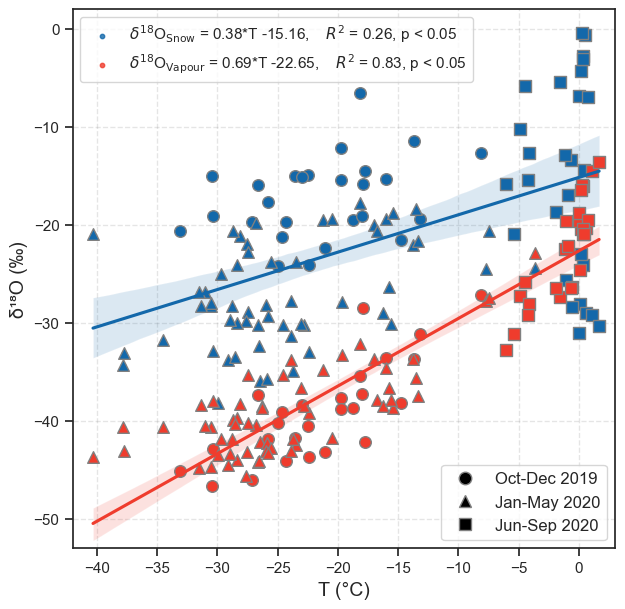

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress
import seaborn as sns
import matplotlib

# Load the data
file_path = "C:\\CiASOM\\PhD\\07.Manuscripts\\#2.Snow Surface\\Figures\\Vapour_Snow\\00_All_in_one.xlsx"
sheet_name = "Vap_SS_d18O"
data = pd.read_excel(file_path, sheet_name=sheet_name)

# Ensure the 'Date' column is in datetime format
data['Unique_Date'] = pd.to_datetime(data['Unique_Date'])

# Define date ranges
oct19_dec19 = (data['Unique_Date'] >= '2019-10-01') & (data['Unique_Date'] <= '2019-12-31')
jan20_may20 = (data['Unique_Date'] >= '2020-01-01') & (data['Unique_Date'] <= '2020-05-31')
jun20_sep20 = (data['Unique_Date'] >= '2020-06-01') & (data['Unique_Date'] <= '2020-09-30')

# Drop rows with missing values in the "Air_temp" column
data.dropna(subset=['Air_Temp'], inplace=True)

# Extracting relevant columns
air_temp = data['Air_Temp']
d18O_SS_avg = data['d18O_SS_average']
d18O_VAP_avg = data['d18O_VAP_average']

# Perform linear regression
slope_SS, intercept_SS, r_value_SS, p_value_SS, std_err_SS = linregress(air_temp, d18O_SS_avg)
slope_VAP, intercept_VAP, r_value_VAP, p_value_VAP, std_err_VAP = linregress(air_temp, d18O_VAP_avg)

# Set font family to 'Arial' for the entire plot
matplotlib.rcParams['font.family'] = 'Arial'

# Set font size for labels and legends
plt.rcParams['font.size'] = 12

# Set background to white and create a figure
plt.figure(facecolor='white', figsize=(7, 7))  # Set a bigger figure size (width, height)

# Set custom parameters for seaborn with box around the plot
custom_params = {"axes.spines.right": True, "axes.spines.top": True}
sns.set_theme(style="ticks", rc=custom_params)

# Scatter plot with regression lines
p_value_SS_text = f"p {'< 0.05' if p_value_SS < 0.05 else f'>= 0.05'}"
p_value_VAP_text = f"p {'< 0.05' if p_value_VAP < 0.05 else f'>= 0.05'}"

sns.regplot(x=air_temp, y=d18O_SS_avg, color='#1368AA', label=f'$\delta^{{18}}$O$_{{\mathrm{{Snow}}}}$ = {slope_SS:.2f}*T {intercept_SS:.2f},    $R^2$ = {r_value_SS**2:.2f}, {p_value_SS_text}', scatter_kws={'s': 10})
sns.regplot(x=air_temp, y=d18O_VAP_avg, color='#EF3C2D', label=f'$\delta^{{18}}$O$_{{\mathrm{{Vapour}}}}$ = {slope_VAP:.2f}*T {intercept_VAP:.2f},    $R^2$ = {r_value_VAP**2:.2f}, {p_value_VAP_text}', scatter_kws={'s': 10})

# Overlay scatter plots with different markers and edgecolor for each date range
plt.scatter(air_temp[oct19_dec19], d18O_SS_avg[oct19_dec19], color='#1368AA', s=70, marker='o', edgecolor='grey')
plt.scatter(air_temp[jan20_may20], d18O_SS_avg[jan20_may20], color='#1368AA', s=70, marker='^', edgecolor='grey')
plt.scatter(air_temp[jun20_sep20], d18O_SS_avg[jun20_sep20], color='#1368AA', s=70, marker='s', edgecolor='grey')

plt.scatter(air_temp[oct19_dec19], d18O_VAP_avg[oct19_dec19], color='#EF3C2D', s=70, marker='o', edgecolor='grey')
plt.scatter(air_temp[jan20_may20], d18O_VAP_avg[jan20_may20], color='#EF3C2D', s=70, marker='^', edgecolor='grey')
plt.scatter(air_temp[jun20_sep20], d18O_VAP_avg[jun20_sep20], color='#EF3C2D', s=70, marker='s', edgecolor='grey')


# Add custom legend entries for regression lines
legend = plt.legend()

# Set legend font to Arial
for text in legend.get_texts():
    text.set_fontname('Arial')
    
# Create custom legend for date ranges
from matplotlib.lines import Line2D
custom_lines = [Line2D([0], [0], color='black', marker='o', lw=0, markersize=9, markeredgecolor='grey'),
                Line2D([0], [0], color='black', marker='^', lw=0, markersize=9, markeredgecolor='grey'),
                Line2D([0], [0], color='black', marker='s', lw=0, markersize=9, markeredgecolor='grey')]

legend2 = plt.legend(custom_lines, ['Oct-Dec 2019', 'Jan-May 2020', 'Jun-Sep 2020'], 
                     loc="lower right", fontsize=12)

# Add the first legend manually to the plot
plt.gca().add_artist(legend)

# Set legend font to Arial (for the second legend)
for text in legend2.get_texts():
    text.set_fontname('Arial')
legend2.get_title().set_fontname('Corbel')

# Labeling the plot with Corbel font family
plt.xlabel('T (°C)', fontname='Arial', fontsize=14)
plt.ylabel('δ¹⁸O (‰)', fontname='Arial', fontsize=14)

# Set tick labels font to Corbel
plt.xticks(fontname='Arial')
plt.yticks(fontname='Arial')

# Set the size of the tick labels
ax.tick_params(axis='x', labelsize=14, length=7, width=2)
ax.tick_params(axis='y', labelsize=14, length=7, width=2)

# Set the spine thickness (the box around the plot)
spine_width = 2
ax.spines['top'].set_linewidth(spine_width)
ax.spines['right'].set_linewidth(spine_width)
ax.spines['left'].set_linewidth(spine_width)
ax.spines['bottom'].set_linewidth(spine_width)

# Adding gridlines in grey, dashed, and 20% transparent
plt.grid(True, color="#808080", linestyle='--', alpha=0.2)

# Set x and y-axis limits to the complete dataset "data"
plt.xlim(-42,3)
plt.ylim(-53,2)

# Save the plot as a 600 dpi JPEG file in the same folder
plt.savefig("C:\\CiASOM\\PhD\\07.Manuscripts\\#2.Snow Surface\\Figures\\Vapour_Snow\\airtemp_d18O_04032024.jpg", dpi=600, bbox_inches='tight')

# Show the plot
plt.show()

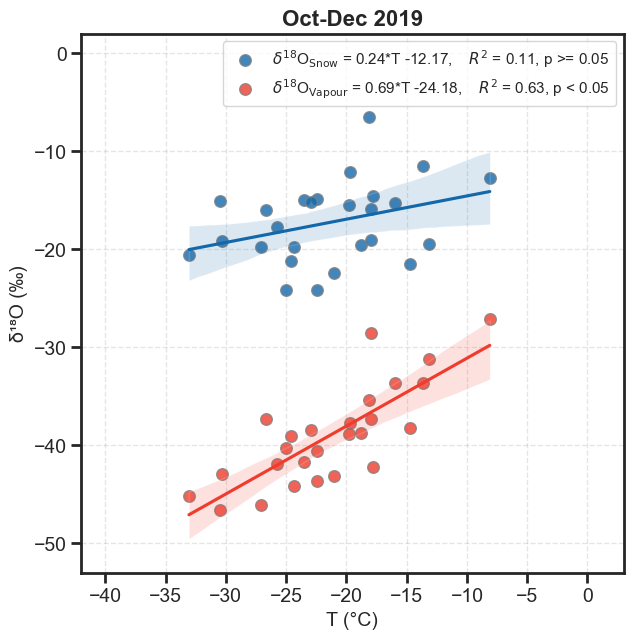

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress
import seaborn as sns
import matplotlib

# Load the data
file_path = "C:\\CiASOM\\PhD\\07.Manuscripts\\#2.Snow Surface\\Figures\\Vapour_Snow\\00_All_in_one.xlsx"
sheet_name = "Vap_SS_d18O"
data = pd.read_excel(file_path, sheet_name=sheet_name)

# Ensure the 'Date' column is in datetime format
data['Unique_Date'] = pd.to_datetime(data['Unique_Date'])

# Define date ranges
oct19_dec19 = (data['Unique_Date'] >= '2019-10-01') & (data['Unique_Date'] <= '2019-12-31')

# Filter the data for October 2019 to December 2019
data_oct_dec = data.loc[oct19_dec19].copy()

# Drop rows with missing values in the "Air_temp" column
data_oct_dec.dropna(subset=['Air_Temp'], inplace=True)

# Extracting relevant columns
air_temp = data_oct_dec['Air_Temp']
d18O_SS_avg = data_oct_dec['d18O_SS_average']
d18O_VAP_avg = data_oct_dec['d18O_VAP_average']

# Perform linear regression
slope_SS, intercept_SS, r_value_SS, p_value_SS, std_err_SS = linregress(air_temp, d18O_SS_avg)
slope_VAP, intercept_VAP, r_value_VAP, p_value_VAP, std_err_VAP = linregress(air_temp, d18O_VAP_avg)

# Set font family to 'Arial' for the entire plot
matplotlib.rcParams['font.family'] = 'Arial'

# Set font size for labels and legends
plt.rcParams['font.size'] = 12

# Set background to white and create a figure
plt.figure(facecolor='white', figsize=(7, 7))  # Set a bigger figure size (width, height)

# Set custom parameters for seaborn with box around the plot
custom_params = {"axes.spines.right": True, "axes.spines.top": True}
sns.set_theme(style="ticks", rc=custom_params)

# Scatter plot with regression lines
p_value_SS_text = f"p {'< 0.05' if p_value_SS < 0.05 else f'>= 0.05'}"
p_value_VAP_text = f"p {'< 0.05' if p_value_VAP < 0.05 else f'>= 0.05'}"

ax = plt.gca()  # Get the current Axes object

sns.regplot(x=air_temp, y=d18O_SS_avg, color='#1368AA', label=f'$\delta^{{18}}$O$_{{\mathrm{{Snow}}}}$ = {slope_SS:.2f}*T {intercept_SS:.2f},    $R^2$ = {r_value_SS**2:.2f}, {p_value_SS_text}', scatter_kws={'s': 70, 'edgecolor': 'grey'}, marker='o')
sns.regplot(x=air_temp, y=d18O_VAP_avg, color='#EF3C2D', label=f'$\delta^{{18}}$O$_{{\mathrm{{Vapour}}}}$ = {slope_VAP:.2f}*T {intercept_VAP:.2f},    $R^2$ = {r_value_VAP**2:.2f}, {p_value_VAP_text}', scatter_kws={'s': 70, 'edgecolor': 'grey'}, marker='o')

# Add custom legend entries for regression lines
legend = plt.legend()

# Set legend font to Arial
for text in legend.get_texts():
    text.set_fontname('Arial')
    
# Labeling the plot with Arial font family
plt.xlabel('T (°C)', fontname='Arial', fontsize=14)
plt.ylabel('δ¹⁸O (‰)', fontname='Arial', fontsize=14)

# Set tick labels font to Corbel
plt.xticks(fontname='Arial')
plt.yticks(fontname='Arial')

# Set the size of the tick labels
ax.tick_params(axis='x', labelsize=14, length=7, width=2)
ax.tick_params(axis='y', labelsize=14, length=7, width=2)

# Set the spine thickness (the box around the plot)
spine_width = 2
ax.spines['top'].set_linewidth(spine_width)
ax.spines['right'].set_linewidth(spine_width)
ax.spines['left'].set_linewidth(spine_width)
ax.spines['bottom'].set_linewidth(spine_width)

# Adding gridlines in grey, dashed, and 20% transparent
plt.grid(True, color="#808080", linestyle='--', alpha=0.2)

# Set x and y-axis limits to the complete dataset "data"
plt.xlim(-42,3)
plt.ylim(-53,2)

# Add a title to the plot
plt.title("Oct-Dec 2019", fontsize=16, fontname='Arial', fontweight='bold')

# Save the plot as a 600 dpi JPEG file in the same folder
plt.savefig("C:\\CiASOM\\PhD\\07.Manuscripts\\#2.Snow Surface\\Figures\\Vapour_Snow\\airtemp_d18O_oct_04032024.jpg", dpi=600, bbox_inches='tight')

# Show the plot
plt.show()


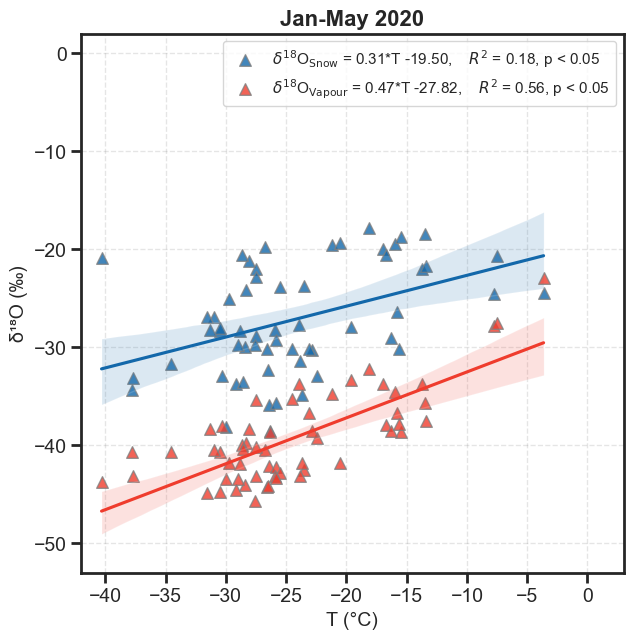

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress
import seaborn as sns
import matplotlib

# Load the data
file_path = "C:\\CiASOM\\PhD\\07.Manuscripts\\#2.Snow Surface\\Figures\\Vapour_Snow\\00_All_in_one.xlsx"
sheet_name = "Vap_SS_d18O"
data = pd.read_excel(file_path, sheet_name=sheet_name)

# Ensure the 'Date' column is in datetime format
data['Unique_Date'] = pd.to_datetime(data['Unique_Date'])

# Define date ranges
jan20_may20 = (data['Unique_Date'] >= '2020-01-01') & (data['Unique_Date'] <= '2020-05-31')

# Filter the data for October 2019 to December 2019
data_jan_may = data.loc[jan20_may20].copy()

# Drop rows with missing values in the "Air_temp" column
data_jan_may.dropna(subset=['Air_Temp'], inplace=True)

# Extracting relevant columns
air_temp = data_jan_may['Air_Temp']
d18O_SS_avg = data_jan_may['d18O_SS_average']
d18O_VAP_avg = data_jan_may['d18O_VAP_average']

# Perform linear regression
slope_SS, intercept_SS, r_value_SS, p_value_SS, std_err_SS = linregress(air_temp, d18O_SS_avg)
slope_VAP, intercept_VAP, r_value_VAP, p_value_VAP, std_err_VAP = linregress(air_temp, d18O_VAP_avg)

# Set font family to 'Arial' for the entire plot
matplotlib.rcParams['font.family'] = 'Arial'

# Set font size for labels and legends
plt.rcParams['font.size'] = 12

# Set background to white and create a figure
plt.figure(facecolor='white', figsize=(7, 7))  # Set a bigger figure size (width, height)

# Set custom parameters for seaborn with box around the plot
custom_params = {"axes.spines.right": True, "axes.spines.top": True}
sns.set_theme(style="ticks", rc=custom_params)

# Scatter plot with regression lines
p_value_SS_text = f"p {'< 0.05' if p_value_SS < 0.05 else f'>= 0.05'}"
p_value_VAP_text = f"p {'< 0.05' if p_value_VAP < 0.05 else f'>= 0.05'}"

ax = plt.gca()  # Get the current Axes object

sns.regplot(x=air_temp, y=d18O_SS_avg, color='#1368AA', label=f'$\delta^{{18}}$O$_{{\mathrm{{Snow}}}}$ = {slope_SS:.2f}*T {intercept_SS:.2f},    $R^2$ = {r_value_SS**2:.2f}, {p_value_SS_text}', scatter_kws={'s': 70, 'edgecolor': 'grey'}, marker='^')
sns.regplot(x=air_temp, y=d18O_VAP_avg, color='#EF3C2D', label=f'$\delta^{{18}}$O$_{{\mathrm{{Vapour}}}}$ = {slope_VAP:.2f}*T {intercept_VAP:.2f},    $R^2$ = {r_value_VAP**2:.2f}, {p_value_VAP_text}', scatter_kws={'s': 70, 'edgecolor': 'grey'}, marker='^')

# Add custom legend entries for regression lines
legend = plt.legend()

# Set legend font to Arial
for text in legend.get_texts():
    text.set_fontname('Arial')
    
# Labeling the plot with Corbel font family
plt.xlabel('T (°C)', fontname='Arial', fontsize=14)
plt.ylabel('δ¹⁸O (‰)', fontname='Arial', fontsize=14)

# Set tick labels font to Arial
plt.xticks(fontname='Arial')
plt.yticks(fontname='Arial')

# Set the size of the tick labels
ax.tick_params(axis='x', labelsize=14, length=7, width=2)
ax.tick_params(axis='y', labelsize=14, length=7, width=2)

# Set the spine thickness (the box around the plot)
spine_width = 2
ax.spines['top'].set_linewidth(spine_width)
ax.spines['right'].set_linewidth(spine_width)
ax.spines['left'].set_linewidth(spine_width)
ax.spines['bottom'].set_linewidth(spine_width)

# Adding gridlines in grey, dashed, and 20% transparent
plt.grid(True, color="#808080", linestyle='--', alpha=0.2)

# Set x and y-axis limits to the complete dataset "data"
plt.xlim(-42,3)
plt.ylim(-53,2)

# Add a title to the plot
plt.title("Jan-May 2020", fontsize=16, fontname='Arial', fontweight='bold')

# Save the plot as a 600 dpi JPEG file in the same folder
plt.savefig("C:\\CiASOM\\PhD\\07.Manuscripts\\#2.Snow Surface\\Figures\\Vapour_Snow\\airtemp_d18O_jan_04032024.jpg", dpi=600, bbox_inches='tight')

# Show the plot
plt.show()

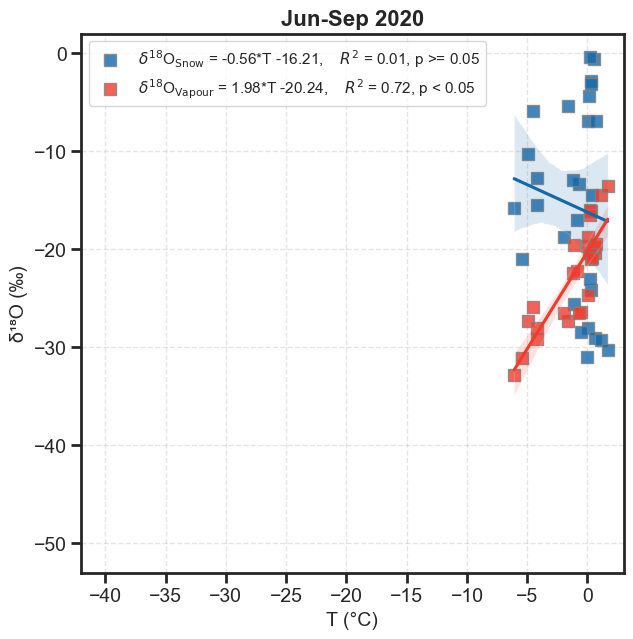

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress
import seaborn as sns
import matplotlib

# Load the data
file_path = "C:\\CiASOM\\PhD\\07.Manuscripts\\#2.Snow Surface\\Figures\\Vapour_Snow\\00_All_in_one.xlsx"
sheet_name = "Vap_SS_d18O"
data = pd.read_excel(file_path, sheet_name=sheet_name)

# Ensure the 'Date' column is in datetime format
data['Unique_Date'] = pd.to_datetime(data['Unique_Date'])

# Define date ranges
jun20_sep20 = (data['Unique_Date'] >= '2020-06-01') & (data['Unique_Date'] <= '2020-09-30')

# Filter the data for October 2019 to December 2019
data_jun_sep = data.loc[jun20_sep20].copy()

# Drop rows with missing values in the "Air_temp" column
data_jun_sep.dropna(subset=['Air_Temp'], inplace=True)

# Extracting relevant columns
air_temp = data_jun_sep['Air_Temp']
d18O_SS_avg = data_jun_sep['d18O_SS_average']
d18O_VAP_avg = data_jun_sep['d18O_VAP_average']

# Perform linear regression
slope_SS, intercept_SS, r_value_SS, p_value_SS, std_err_SS = linregress(air_temp, d18O_SS_avg)
slope_VAP, intercept_VAP, r_value_VAP, p_value_VAP, std_err_VAP = linregress(air_temp, d18O_VAP_avg)

# Set font family to 'Arial' for the entire plot
matplotlib.rcParams['font.family'] = 'Arial'

# Set font size for labels and legends
plt.rcParams['font.size'] = 12

# Set background to white and create a figure
plt.figure(facecolor='white', figsize=(7, 7))  # Set a bigger figure size (width, height)

# Set custom parameters for seaborn with box around the plot
custom_params = {"axes.spines.right": True, "axes.spines.top": True}
sns.set_theme(style="ticks", rc=custom_params)

# Scatter plot with regression lines
p_value_SS_text = f"p {'< 0.05' if p_value_SS < 0.05 else f'>= 0.05'}"
p_value_VAP_text = f"p {'< 0.05' if p_value_VAP < 0.05 else f'>= 0.05'}"

ax = plt.gca()  # Get the current Axes object

sns.regplot(x=air_temp, y=d18O_SS_avg, color='#1368AA', label=f'$\delta^{{18}}$O$_{{\mathrm{{Snow}}}}$ = {slope_SS:.2f}*T {intercept_SS:.2f},    $R^2$ = {r_value_SS**2:.2f}, {p_value_SS_text}', scatter_kws={'s': 70, 'edgecolor': 'grey'}, marker='s')
sns.regplot(x=air_temp, y=d18O_VAP_avg, color='#EF3C2D', label=f'$\delta^{{18}}$O$_{{\mathrm{{Vapour}}}}$ = {slope_VAP:.2f}*T {intercept_VAP:.2f},    $R^2$ = {r_value_VAP**2:.2f}, {p_value_VAP_text}', scatter_kws={'s': 70, 'edgecolor': 'grey'}, marker='s')

# Add custom legend entries for regression lines
legend = plt.legend()

# Set legend font to Arial
for text in legend.get_texts():
    text.set_fontname('Arial')
    
# Labeling the plot with Arial font family
plt.xlabel('T (°C)', fontname='Arial', fontsize=14)
plt.ylabel('δ¹⁸O (‰)', fontname='Arial', fontsize=14)

# Set tick labels font to Arial
plt.xticks(fontname='Arial')
plt.yticks(fontname='Arial')

# Set the size of the tick labels
ax.tick_params(axis='x', labelsize=14, length=7, width=2)
ax.tick_params(axis='y', labelsize=14, length=7, width=2)

# Set the spine thickness (the box around the plot)
spine_width = 2
ax.spines['top'].set_linewidth(spine_width)
ax.spines['right'].set_linewidth(spine_width)
ax.spines['left'].set_linewidth(spine_width)
ax.spines['bottom'].set_linewidth(spine_width)

# Adding gridlines in grey, dashed, and 20% transparent
plt.grid(True, color="#808080", linestyle='--', alpha=0.2)

# Set x and y-axis limits to the complete dataset "data"
plt.xlim(-42,3)
plt.ylim(-53,2)

# Add a title to the plot
plt.title("Jun-Sep 2020", fontsize=16, fontname='Arial', fontweight='bold')

# Save the plot as a 600 dpi JPEG file in the same folder
plt.savefig("C:\\CiASOM\\PhD\\07.Manuscripts\\#2.Snow Surface\\Figures\\Vapour_Snow\\airtemp_d18O_jun_04032024.jpg", dpi=600, bbox_inches='tight')

# Show the plot
plt.show()

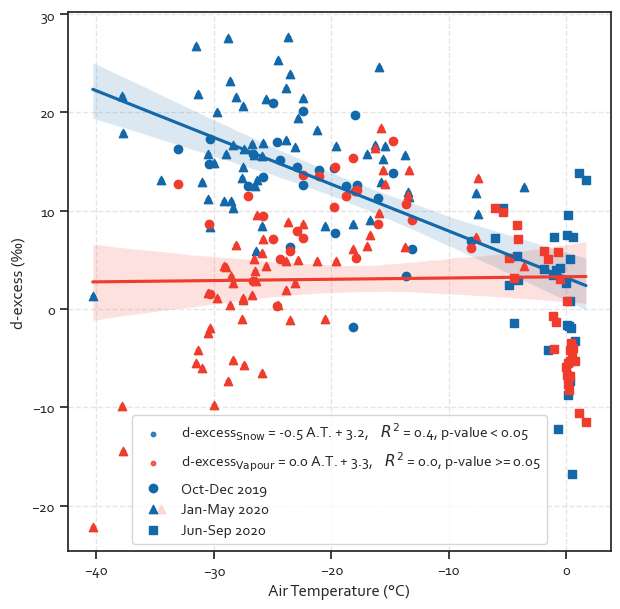

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress
import seaborn as sns
import matplotlib

# Load the data
file_path = "C:\\CiASOM\\PhD\\07.Manuscripts\\#2.Snow Surface\\Figures\\Vapour_Snow\\00_All_in_one.xlsx"
sheet_name = "Vap_SS_d18O"
data = pd.read_excel(file_path, sheet_name=sheet_name)

# Ensure the 'Date' column is in datetime format
data['Unique_Date'] = pd.to_datetime(data['Unique_Date'])

# Define date ranges
oct19_dec19 = (data['Unique_Date'] >= '2019-10-01') & (data['Unique_Date'] <= '2019-12-31')
jan20_may20 = (data['Unique_Date'] >= '2020-01-01') & (data['Unique_Date'] <= '2020-05-31')
jun20_sep20 = (data['Unique_Date'] >= '2020-06-01') & (data['Unique_Date'] <= '2020-09-30')

# Drop rows with missing values in the "Air_temp" column
data.dropna(subset=['Air_Temp'], inplace=True)

# Extracting relevant columns
air_temp = data['Air_Temp']
dex_SS_avg = data['dex_SS_average']
dex_VAP_avg = data['dex_VAP_average']

# Perform linear regression
slope_SS, intercept_SS, r_value_SS, p_value_SS, std_err_SS = linregress(air_temp, dex_SS_avg)
slope_VAP, intercept_VAP, r_value_VAP, p_value_VAP, std_err_VAP = linregress(air_temp, dex_VAP_avg)

# Set font family to 'Corbel' for the entire plot
matplotlib.rcParams['font.family'] = 'Corbel'

# Set font size for labels and legends
plt.rcParams['font.size'] = 12

# Set background to white and create a figure
plt.figure(facecolor='white', figsize=(7, 7))  # Set a bigger figure size (width, height)

# Set custom parameters for seaborn with box around the plot
custom_params = {"axes.spines.right": True, "axes.spines.top": True}
sns.set_theme(style="ticks", rc=custom_params)

# Scatter plot with regression lines
p_value_SS_text = f"p-value {'< 0.05' if p_value_SS < 0.05 else f'>= 0.05'}"
p_value_VAP_text = f"p-value {'< 0.05' if p_value_VAP < 0.05 else f'>= 0.05'}"

sns.regplot(x=air_temp, y=dex_SS_avg, color='#1368AA', label=f'd-excess$_{{\mathrm{{Snow}}}}$ = {slope_SS:.1f} A.T. + {intercept_SS:.1f},    $R^2$ = {r_value_SS**2:.1f}, {p_value_SS_text}', scatter_kws={'s': 10})
sns.regplot(x=air_temp, y=dex_VAP_avg, color='#EF3C2D', label=f'd-excess$_{{\mathrm{{Vapour}}}}$ = {slope_VAP:.1f} A.T. + {intercept_VAP:.1f},    $R^2$ = {r_value_VAP**2:.1f}, {p_value_VAP_text}', scatter_kws={'s': 10})

# Overlay scatter plots with different markers for each date range
plt.scatter(air_temp[oct19_dec19], dex_SS_avg[oct19_dec19], color='#1368AA', marker='o', label='Oct-Dec 2019')
plt.scatter(air_temp[jan20_may20], dex_SS_avg[jan20_may20], color='#1368AA', marker='^', label='Jan-May 2020')
plt.scatter(air_temp[jun20_sep20], dex_SS_avg[jun20_sep20], color='#1368AA', marker='s', label='Jun-Sep 2020')

plt.scatter(air_temp[oct19_dec19], dex_VAP_avg[oct19_dec19], color='#EF3C2D', marker='o')
plt.scatter(air_temp[jan20_may20], dex_VAP_avg[jan20_may20], color='#EF3C2D', marker='^')
plt.scatter(air_temp[jun20_sep20], dex_VAP_avg[jun20_sep20], color='#EF3C2D', marker='s')

# Add custom legend entries for regression lines
legend = plt.legend()

# Set legend font to Corbel
for text in legend.get_texts():
    text.set_fontname('Corbel')

# Labeling the plot with Corbel font family
plt.xlabel('Air Temperature (°C)', fontname='Corbel', fontsize=12)
plt.ylabel('d-excess (‰)', fontname='Corbel', fontsize=12)

# Set tick labels font to Corbel
plt.xticks(fontname='Corbel')
plt.yticks(fontname='Corbel')

# Adding gridlines in grey, dashed, and 20% transparent
plt.grid(True, color="#808080", linestyle='--', alpha=0.2)

# Save the plot as a 600 dpi JPEG file in the same folder
plt.savefig("C:\\CiASOM\\PhD\\07.Manuscripts\\#2.Snow Surface\\Figures\\Vapour_Snow\\airtemp_dex.jpg", dpi=600, bbox_inches='tight')

# Show the plot
plt.show()


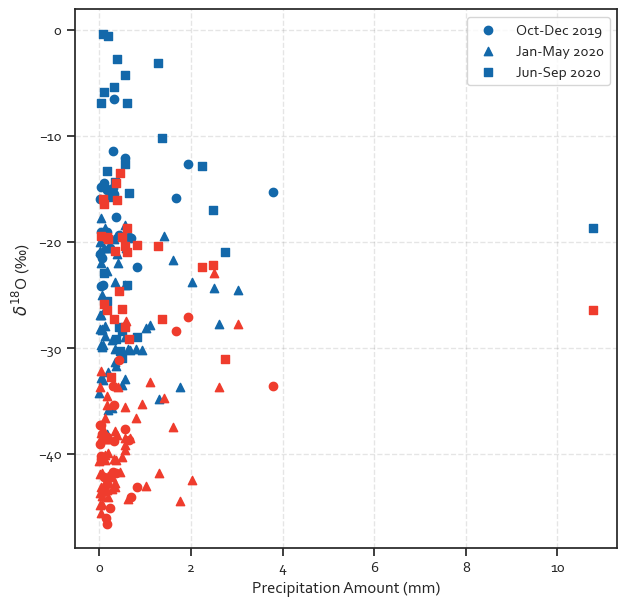

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress
import seaborn as sns
import matplotlib

# Load the data
file_path = "C:\\CiASOM\\PhD\\07.Manuscripts\\#2.Snow Surface\\Figures\\Vapour_Snow\\00_All_in_one.xlsx"
sheet_name = "Vap_SS_d18O"
data = pd.read_excel(file_path, sheet_name=sheet_name)

# Ensure the 'Date' column is in datetime format
data['Unique_Date'] = pd.to_datetime(data['Unique_Date'])

# Define date ranges
oct19_dec19 = (data['Unique_Date'] >= '2019-10-01') & (data['Unique_Date'] <= '2019-12-31')
jan20_may20 = (data['Unique_Date'] >= '2020-01-01') & (data['Unique_Date'] <= '2020-05-31')
jun20_sep20 = (data['Unique_Date'] >= '2020-06-01') & (data['Unique_Date'] <= '2020-09-30')

# Drop rows with missing values in the "Air_temp" column
data.dropna(subset=['Air_Temp'], inplace=True)

# Extracting relevant columns
Precip = data['Precipitation_amount_mm']
d18O_SS_avg = data['d18O_SS_average']
d18O_VAP_avg = data['d18O_VAP_average']

# Perform linear regression
slope_SS, intercept_SS, r_value_SS, p_value_SS, std_err_SS = linregress(Precip, d18O_SS_avg)
slope_VAP, intercept_VAP, r_value_VAP, p_value_VAP, std_err_VAP = linregress(Precip, d18O_VAP_avg)

# Set font family to 'Corbel' for the entire plot
matplotlib.rcParams['font.family'] = 'Corbel'

# Set font size for labels and legends
plt.rcParams['font.size'] = 12

# Set background to white and create a figure
plt.figure(facecolor='white', figsize=(7, 7))  # Set a bigger figure size (width, height)

# Set custom parameters for seaborn with box around the plot
custom_params = {"axes.spines.right": True, "axes.spines.top": True}
sns.set_theme(style="ticks", rc=custom_params)

# Scatter plot with regression lines
p_value_SS_text = f"p-value {'< 0.05' if p_value_SS < 0.05 else f'>= 0.05'}"
p_value_VAP_text = f"p-value {'< 0.05' if p_value_VAP < 0.05 else f'>= 0.05'}"

#sns.regplot(x=Precip, y=dex_SS_avg, color='#1368AA', label=f'd-excess$_{{\mathrm{{Snow}}}}$ = {slope_SS:.1f} A.T. + {intercept_SS:.1f},    $R^2$ = {r_value_SS**2:.1f}, {p_value_SS_text}', scatter_kws={'s': 10})
#sns.regplot(x=Precip, y=dex_VAP_avg, color='#EF3C2D', label=f'd-excess$_{{\mathrm{{Vapour}}}}$ = {slope_VAP:.1f} A.T. + {intercept_VAP:.1f},    $R^2$ = {r_value_VAP**2:.1f}, {p_value_VAP_text}', scatter_kws={'s': 10})

# Overlay scatter plots with different markers for each date range
plt.scatter(Precip[oct19_dec19], d18O_SS_avg[oct19_dec19], color='#1368AA', marker='o', label='Oct-Dec 2019')
plt.scatter(Precip[jan20_may20], d18O_SS_avg[jan20_may20], color='#1368AA', marker='^', label='Jan-May 2020')
plt.scatter(Precip[jun20_sep20], d18O_SS_avg[jun20_sep20], color='#1368AA', marker='s', label='Jun-Sep 2020')

plt.scatter(Precip[oct19_dec19], d18O_VAP_avg[oct19_dec19], color='#EF3C2D', marker='o')
plt.scatter(Precip[jan20_may20], d18O_VAP_avg[jan20_may20], color='#EF3C2D', marker='^')
plt.scatter(Precip[jun20_sep20], d18O_VAP_avg[jun20_sep20], color='#EF3C2D', marker='s')

# Add custom legend entries for regression lines
legend = plt.legend()

# Set legend font to Corbel
for text in legend.get_texts():
    text.set_fontname('Corbel')

# Labeling the plot with Corbel font family
plt.xlabel('Precipitation Amount (mm)', fontname='Corbel', fontsize=12)
plt.ylabel('$\delta^{{18}}$O (‰)', fontname='Corbel', fontsize=12)

# Set tick labels font to Corbel
plt.xticks(fontname='Corbel')
plt.yticks(fontname='Corbel')

# Adding gridlines in grey, dashed, and 20% transparent
plt.grid(True, color="#808080", linestyle='--', alpha=0.2)

# Save the plot as a 600 dpi JPEG file in the same folder
plt.savefig("C:\\CiASOM\\PhD\\07.Manuscripts\\#2.Snow Surface\\Figures\\Vapour_Snow\\precip_d18O.jpg", dpi=600, bbox_inches='tight')

# Show the plot
plt.show()

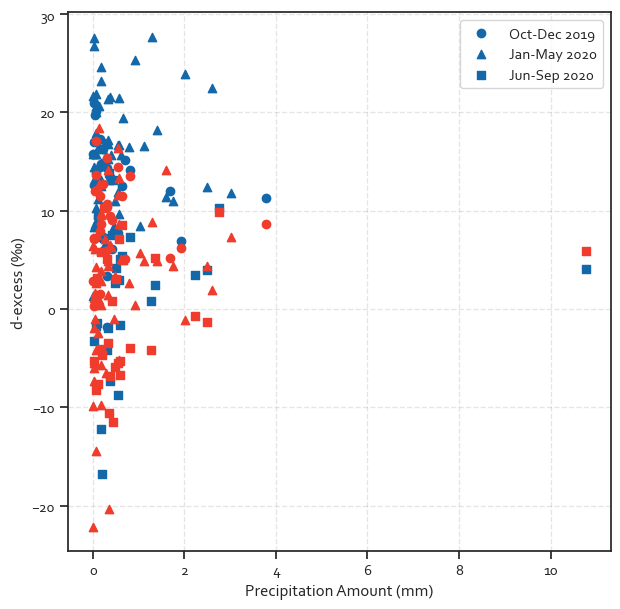

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress
import seaborn as sns
import matplotlib

# Load the data
file_path = "C:\\CiASOM\\PhD\\07.Manuscripts\\#2.Snow Surface\\Figures\\Vapour_Snow\\00_All_in_one.xlsx"
sheet_name = "Vap_SS_d18O"
data = pd.read_excel(file_path, sheet_name=sheet_name)

# Ensure the 'Date' column is in datetime format
data['Unique_Date'] = pd.to_datetime(data['Unique_Date'])

# Define date ranges
oct19_dec19 = (data['Unique_Date'] >= '2019-10-01') & (data['Unique_Date'] <= '2019-12-31')
jan20_may20 = (data['Unique_Date'] >= '2020-01-01') & (data['Unique_Date'] <= '2020-05-31')
jun20_sep20 = (data['Unique_Date'] >= '2020-06-01') & (data['Unique_Date'] <= '2020-09-30')

# Drop rows with missing values in the "Air_temp" column
data.dropna(subset=['Air_Temp'], inplace=True)

# Extracting relevant columns
Precip = data['Precipitation_amount_mm']
dex_SS_avg = data['dex_SS_average']
dex_VAP_avg = data['dex_VAP_average']

# Perform linear regression
slope_SS, intercept_SS, r_value_SS, p_value_SS, std_err_SS = linregress(Precip, dex_SS_avg)
slope_VAP, intercept_VAP, r_value_VAP, p_value_VAP, std_err_VAP = linregress(Precip, dex_VAP_avg)

# Set font family to 'Corbel' for the entire plot
matplotlib.rcParams['font.family'] = 'Corbel'

# Set font size for labels and legends
plt.rcParams['font.size'] = 12

# Set background to white and create a figure
plt.figure(facecolor='white', figsize=(7, 7))  # Set a bigger figure size (width, height)

# Set custom parameters for seaborn with box around the plot
custom_params = {"axes.spines.right": True, "axes.spines.top": True}
sns.set_theme(style="ticks", rc=custom_params)

# Scatter plot with regression lines
p_value_SS_text = f"p-value {'< 0.05' if p_value_SS < 0.05 else f'>= 0.05'}"
p_value_VAP_text = f"p-value {'< 0.05' if p_value_VAP < 0.05 else f'>= 0.05'}"

#sns.regplot(x=Precip, y=dex_SS_avg, color='#1368AA', label=f'd-excess$_{{\mathrm{{Snow}}}}$ = {slope_SS:.1f} A.T. + {intercept_SS:.1f},    $R^2$ = {r_value_SS**2:.1f}, {p_value_SS_text}', scatter_kws={'s': 10})
#sns.regplot(x=Precip, y=dex_VAP_avg, color='#EF3C2D', label=f'd-excess$_{{\mathrm{{Vapour}}}}$ = {slope_VAP:.1f} A.T. + {intercept_VAP:.1f},    $R^2$ = {r_value_VAP**2:.1f}, {p_value_VAP_text}', scatter_kws={'s': 10})

# Overlay scatter plots with different markers for each date range
plt.scatter(Precip[oct19_dec19], dex_SS_avg[oct19_dec19], color='#1368AA', marker='o', label='Oct-Dec 2019')
plt.scatter(Precip[jan20_may20], dex_SS_avg[jan20_may20], color='#1368AA', marker='^', label='Jan-May 2020')
plt.scatter(Precip[jun20_sep20], dex_SS_avg[jun20_sep20], color='#1368AA', marker='s', label='Jun-Sep 2020')

plt.scatter(Precip[oct19_dec19], dex_VAP_avg[oct19_dec19], color='#EF3C2D', marker='o')
plt.scatter(Precip[jan20_may20], dex_VAP_avg[jan20_may20], color='#EF3C2D', marker='^')
plt.scatter(Precip[jun20_sep20], dex_VAP_avg[jun20_sep20], color='#EF3C2D', marker='s')

# Add custom legend entries for regression lines
legend = plt.legend()

# Set legend font to Corbel
for text in legend.get_texts():
    text.set_fontname('Corbel')

# Labeling the plot with Corbel font family
plt.xlabel('Precipitation Amount (mm)', fontname='Corbel', fontsize=12)
plt.ylabel('d-excess (‰)', fontname='Corbel', fontsize=12)

# Set tick labels font to Corbel
plt.xticks(fontname='Corbel')
plt.yticks(fontname='Corbel')

# Adding gridlines in grey, dashed, and 20% transparent
plt.grid(True, color="#808080", linestyle='--', alpha=0.2)

# Save the plot as a 600 dpi JPEG file in the same folder
plt.savefig("C:\\CiASOM\\PhD\\07.Manuscripts\\#2.Snow Surface\\Figures\\Vapour_Snow\\precip_dex.jpg", dpi=600, bbox_inches='tight')

# Show the plot
plt.show()

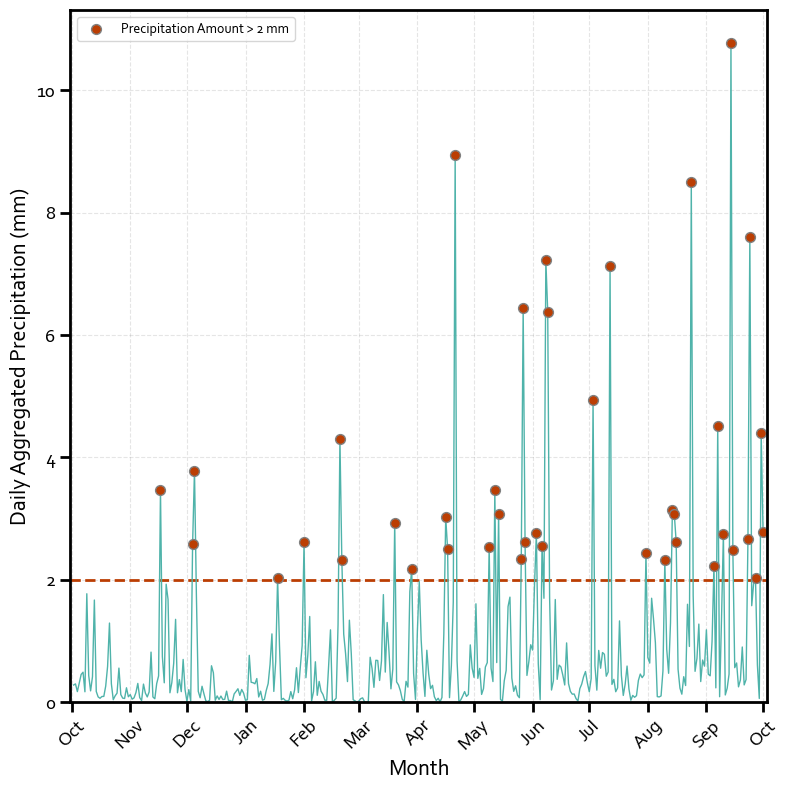

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime

# Set the font family to 'Corbel'
plt.rcParams['font.family'] = 'Corbel'

# Specify the path to your Excel file and sheet name
file_path = r'C:\CiASOM\PhD\07.Manuscripts\#2.Snow Surface\Figures\Vapour_Snow\Precipitation_rates.xlsx'
sheet_name = 'Daily'

# Read the Excel data into a DataFrame
df = pd.read_excel(file_path, sheet_name=sheet_name)

# Assuming 'Date' and 'Aggregated_Daily_Precip_mm' are the column names
x = df['Date']
y = df['Aggregated_Daily_Precip_mm']

# Create a plot without points, only lines
fig, ax = plt.subplots(figsize=(8, 8))  # Adjust the figure size as needed

# Set the grid to 20% grey transparent dashed lines
ax.grid(True, linestyle='--', alpha=0.2, color='grey')
# Add a thicker dashed red grid line at Precipitation=2
ax.axhline(y=2, color='#BB3E03', linestyle='--', linewidth=2)

# Format the date labels to show the name of the month in three-letter format
ax.xaxis.set_major_formatter(mdates.DateFormatter("%b"))

# Set the ticks to be on the 1st of each month
monthly_locator = mdates.MonthLocator(bymonthday=1)
ax.xaxis.set_major_locator(monthly_locator)

# Set the x-axis limits from October 1, 2019, to September 30, 2020
start_date = datetime(2019, 9, 30)
end_date = datetime(2020, 10, 4)

# Adjust the x-axis limits to exclude the last tick
plt.xlim(start_date, end_date - pd.DateOffset(days=1))

plt.xlabel('Month', fontsize=16)
plt.ylabel('Daily Aggregated Precipitation (mm)', fontsize=16)

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Plot the line
ax.plot(x, y, linestyle='-', color='#4FB3AA', linewidth=1)

# Add red circle points for data points with precipitation > 2
above_threshold = y > 2
ax.scatter(x[above_threshold], y[above_threshold], c='#BB3E03', marker='o', s=50, label='Precipitation Amount > 2 mm', zorder=2, edgecolors='grey')

# Add a legend
ax.legend(loc='upper left')

# Set the minimum y-axis value to 0
ax.set_ylim(bottom=0)

# Set the size of the tick labels
ax.tick_params(axis='x', labelsize=14, length=7, width=2)
ax.tick_params(axis='y', labelsize=14, length=7, width=2)

# Set the spine thickness (the box around the plot)
spine_width = 2
ax.spines['top'].set_linewidth(spine_width)
ax.spines['right'].set_linewidth(spine_width)
ax.spines['left'].set_linewidth(spine_width)
ax.spines['bottom'].set_linewidth(spine_width)

# Save the plot as a 600 dpi JPEG in the same folder as the Excel file
plt.savefig(r'C:\CiASOM\PhD\07.Manuscripts\#2.Snow Surface\Figures\Vapour_Snow\precip_amount_TS.jpg', dpi=600, bbox_inches='tight')

# Show the plot
plt.tight_layout()
plt.show()

C:\Users\mardakan\AppData\Local\Temp\ipykernel_23584\3087836682.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


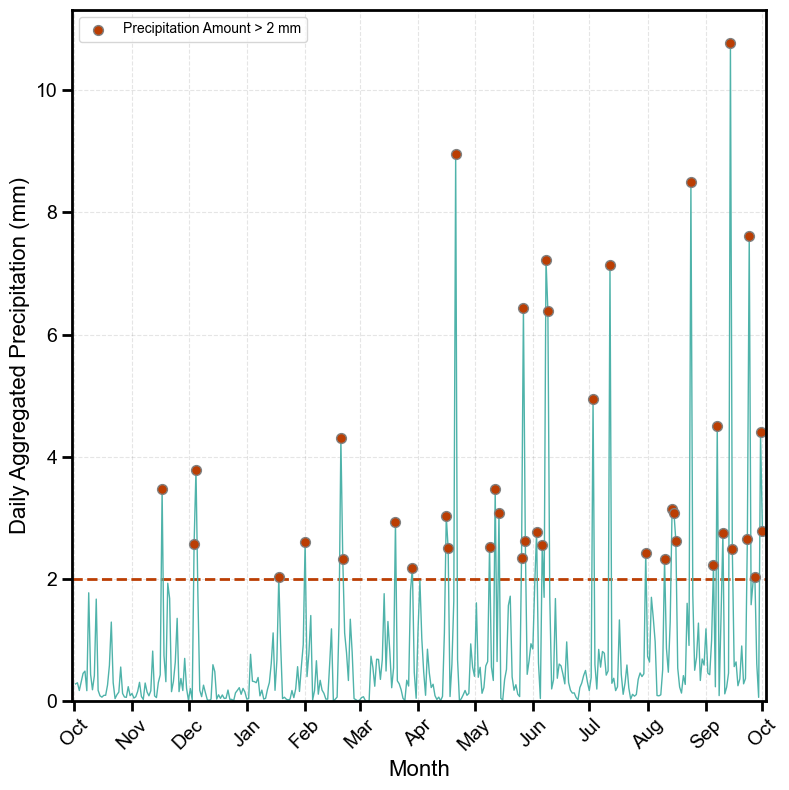

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime

# Set the font family to 'Arial'
plt.rcParams['font.family'] = 'Arial'

# Specify the path to your Excel file and sheet name
file_path = r'C:\CiASOM\PhD\07.Manuscripts\#2.Snow Surface\Figures\Vapour_Snow\Precipitation_rates.xlsx'
sheet_name = 'Daily'

# Read the Excel data into a DataFrame
df = pd.read_excel(file_path, sheet_name=sheet_name)

# Assuming 'Date' and 'Aggregated_Daily_Precip_mm' are the column names
x = df['Date']
y = df['Aggregated_Daily_Precip_mm']

# Create a plot without points, only lines
fig, ax = plt.subplots(figsize=(8, 8))  # Adjust the figure size as needed

# Set the grid to 20% grey transparent dashed lines
ax.grid(True, linestyle='--', alpha=0.2, color='grey')
# Add a thicker dashed red grid line at Precipitation=2
ax.axhline(y=2, color='#BB3E03', linestyle='--', linewidth=2)

# Format the date labels to show the name of the month in three-letter format
ax.xaxis.set_major_formatter(mdates.DateFormatter("%b"))

# Set the ticks to be on the 1st of each month
monthly_locator = mdates.MonthLocator(bymonthday=1)
ax.xaxis.set_major_locator(monthly_locator)

# Set the x-axis limits from October 1, 2019, to September 30, 2020
start_date = datetime(2019, 9, 30)
end_date = datetime(2020, 10, 4)

# Adjust the x-axis limits to exclude the last tick
plt.xlim(start_date, end_date - pd.DateOffset(days=1))

plt.xlabel('Month', fontsize=16)
plt.ylabel('Daily Aggregated Precipitation (mm)', fontsize=16)

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Plot the line
ax.plot(x, y, linestyle='-', color='#4FB3AA', linewidth=1)

# Add red circle points for data points with precipitation > 2
above_threshold = y > 2
ax.scatter(x[above_threshold], y[above_threshold], c='#BB3E03', marker='o', s=50, label='Precipitation Amount > 2 mm', zorder=2, edgecolors='grey')

# Add a legend
ax.legend(loc='upper left')

# Set the minimum y-axis value to 0
ax.set_ylim(bottom=0)

# Set the size of the tick labels
ax.tick_params(axis='x', labelsize=14, length=7, width=2)
ax.tick_params(axis='y', labelsize=14, length=7, width=2)

# Set the spine thickness (the box around the plot)
spine_width = 2
ax.spines['top'].set_linewidth(spine_width)
ax.spines['right'].set_linewidth(spine_width)
ax.spines['left'].set_linewidth(spine_width)
ax.spines['bottom'].set_linewidth(spine_width)

# Save the plot as a 600 dpi JPEG in the same folder as the Excel file
plt.savefig(r'C:\CiASOM\PhD\07.Manuscripts\#2.Snow Surface\Figures\Vapour_Snow\precip_amount_TS_04032024.jpg', dpi=600, bbox_inches='tight')

# Show the plot
plt.tight_layout()
plt.show()

C:\Users\mardakan\AppData\Local\Temp\ipykernel_13664\3147327492.py:22: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('Spectral')


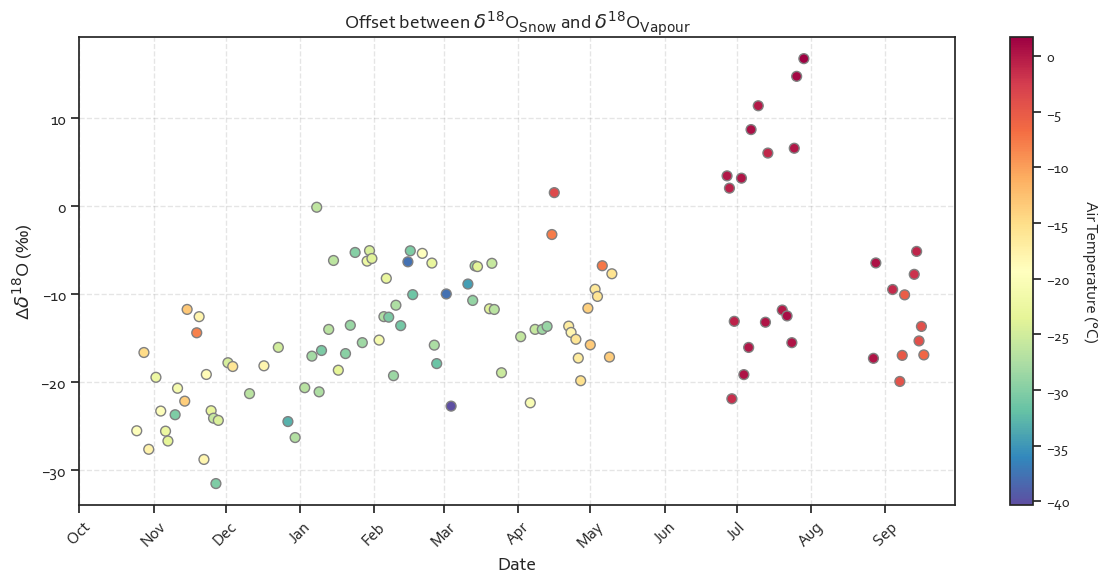

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.dates import DateFormatter
import matplotlib.cm as cm

# Load the dataset
file_path = r"C:\CiASOM\PhD\07.Manuscripts\#2.Snow Surface\Figures\Vapour_Snow\00_All_in_one.xlsx"
sheet_name = "Vap_SS_d18O"
df = pd.read_excel(file_path, sheet_name=sheet_name)

# Calculate the offset between "d18O_SS_average" and "d18O_VAP_average"
df['Offset_d18O'] = df['d18O_VAP_average'] - df['d18O_SS_average']

# Convert the 'Unique_Date' column to datetime
df['Unique_Date'] = pd.to_datetime(df['Unique_Date'])

# Set the font to Corbel for labels and titles
plt.rcParams['font.family'] = 'Corbel'

# Create a color map (Spectral) based on 'Air_Temp' values
cmap = cm.get_cmap('Spectral')
cmap = cmap.reversed()

# Create the scatter plot with points colored by 'Air_Temp'
fig, ax = plt.subplots(figsize=(12, 6))
sc = plt.scatter(
    df['Unique_Date'], df['Offset_d18O'], c=df['Air_Temp'], cmap=cmap,
    s=50, marker='o', edgecolor='gray'
)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Δ$\delta^{18}$O (‰)', fontsize=14)
plt.title('Offset between $\delta^{18}$O$_{\mathrm{Snow}}$ and $\delta^{18}$O$_{\mathrm{Vapour}}$', font='Corbel', fontsize=14)
plt.grid(True, color='gray', linestyle='--', alpha=0.2)
plt.yticks(fontsize=12)

# Create a colorbar for the 'Air_Temp' values
cbar = plt.colorbar(sc, ax=ax)
cbar.set_label('Air Temperature (°C)', font='Corbel', fontsize=12, rotation=270, labelpad=20)

# Change date format to "01-01-2000" and rotate x-axis labels by 45 degrees
date_format = DateFormatter("%b")
ax.xaxis.set_major_formatter(date_format)
plt.xticks(fontsize=12, rotation=45)

# Limit x-axis to the range between "01-10-2019" and "30-09-2020"
start_date = pd.to_datetime("01-10-2019", format="%d-%m-%Y")
end_date = pd.to_datetime("30-09-2020", format="%d-%m-%Y")
plt.xlim(start_date, end_date)

# Save the plot as a JPEG file
plt.savefig(r"C:\CiASOM\PhD\07.Manuscripts\#2.Snow Surface\Figures\Vapour_Snow/offset_d18O_25012024.jpeg", dpi=600, bbox_inches='tight')

# Show the plot
plt.tight_layout()
plt.show()

C:\Users\mardakan\AppData\Local\Temp\ipykernel_13664\154896465.py:22: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('Spectral')


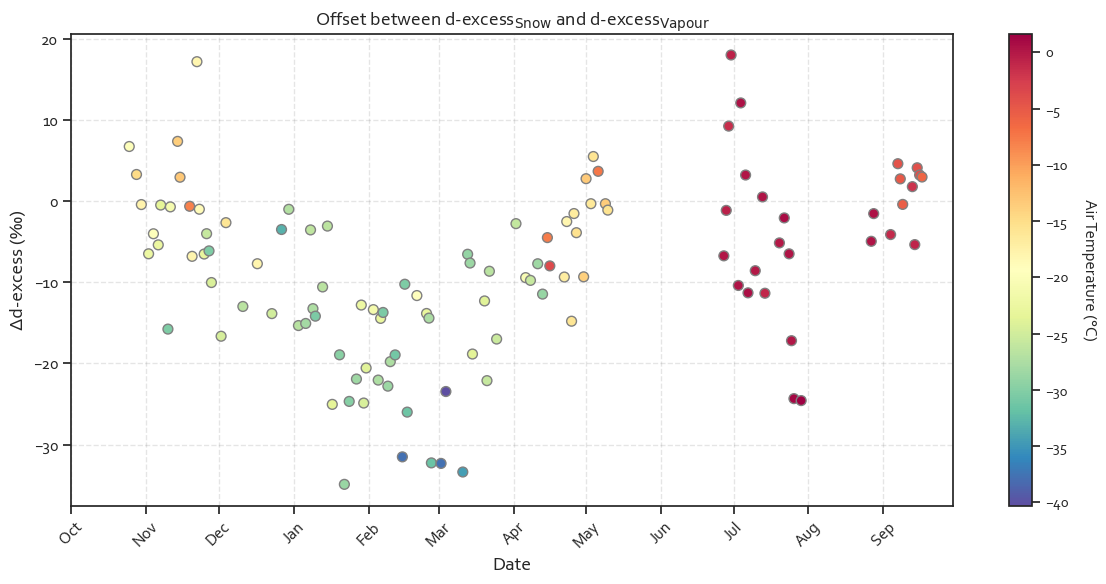

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.dates import DateFormatter
import matplotlib.cm as cm

# Load the dataset
file_path = r"C:\CiASOM\PhD\07.Manuscripts\#2.Snow Surface\Figures\Vapour_Snow\00_All_in_one.xlsx"
sheet_name = "Vap_SS_d18O"
df = pd.read_excel(file_path, sheet_name=sheet_name)

# Calculate the offset between "d18O_SS_average" and "d18O_VAP_average"
df['Offset_dex'] = df['dex_VAP_average'] - df['dex_SS_average']

# Convert the 'Unique_Date' column to datetime
df['Unique_Date'] = pd.to_datetime(df['Unique_Date'])

# Set the font to Corbel for labels and titles
plt.rcParams['font.family'] = 'Corbel'

# Create a color map (Spectral) based on 'Air_Temp' values
cmap = cm.get_cmap('Spectral')
cmap = cmap.reversed()

# Create the scatter plot with points colored by 'Air_Temp'
fig, ax = plt.subplots(figsize=(12, 6))
sc = plt.scatter(
    df['Unique_Date'], df['Offset_dex'], c=df['Air_Temp'], cmap=cmap,
    s=50, marker='o', edgecolor='gray'
)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Δd-excess (‰)', fontsize=14)
plt.title('Offset between d-excess$_{\mathrm{Snow}}$ and d-excess$_{\mathrm{Vapour}}$', font='Corbel', fontsize=14)
plt.grid(True, color='gray', linestyle='--', alpha=0.2)
plt.yticks(fontsize=12)

# Create a colorbar for the 'Air_Temp' values
cbar = plt.colorbar(sc, ax=ax)
cbar.set_label('Air Temperature (°C)', fontsize=12, rotation=270, labelpad=20)

# Change date format to "01-01-2000" and rotate x-axis labels by 45 degrees
date_format = DateFormatter("%b")
ax.xaxis.set_major_formatter(date_format)
plt.xticks(fontsize=12, rotation=45)

# Limit x-axis to the range between "01-10-2019" and "30-09-2020"
start_date = pd.to_datetime("01-10-2019", format="%d-%m-%Y")
end_date = pd.to_datetime("30-09-2020", format="%d-%m-%Y")
plt.xlim(start_date, end_date)

# Show the plot
plt.tight_layout()
plt.show()

C:\Users\mardakan\AppData\Local\Temp\ipykernel_13664\4124325769.py:22: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('turbo')


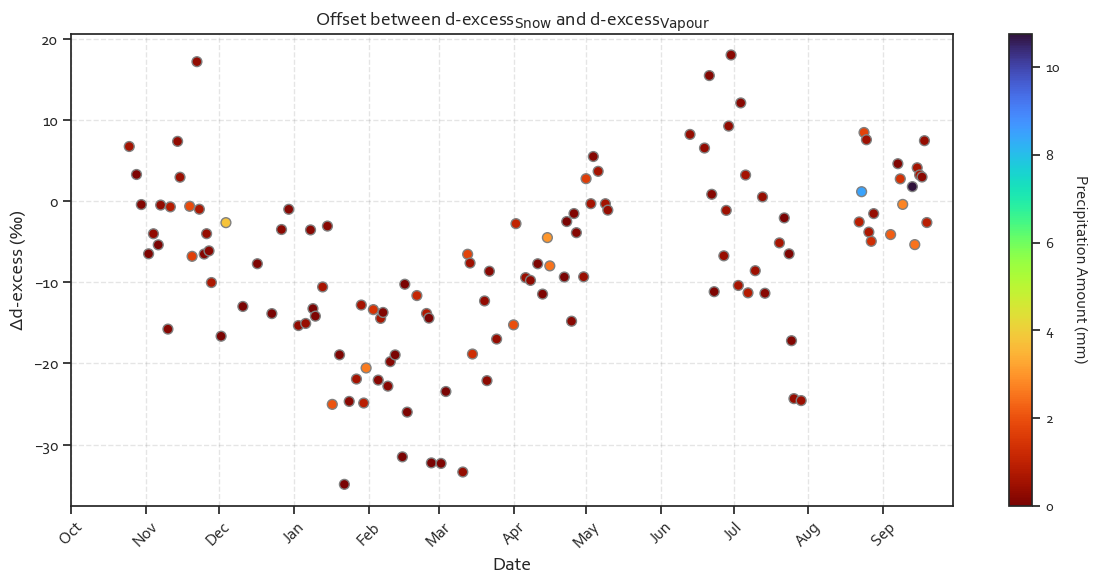

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.dates import DateFormatter
import matplotlib.cm as cm

# Load the dataset
file_path = r"C:\CiASOM\PhD\07.Manuscripts\#2.Snow Surface\Figures\Vapour_Snow\00_All_in_one.xlsx"
sheet_name = "Vap_SS_d18O"
df = pd.read_excel(file_path, sheet_name=sheet_name)

# Calculate the offset between "d18O_SS_average" and "d18O_VAP_average"
df['Offset_dex'] = df['dex_VAP_average'] - df['dex_SS_average']

# Convert the 'Unique_Date' column to datetime
df['Unique_Date'] = pd.to_datetime(df['Unique_Date'])

# Set the font to Corbel for labels and titles
plt.rcParams['font.family'] = 'Corbel'

# Create a color map (Spectral) based on 'Air_Temp' values
cmap = cm.get_cmap('turbo')
cmap = cmap.reversed()

# Create the scatter plot with points colored by 'Air_Temp'
fig, ax = plt.subplots(figsize=(12, 6))
sc = plt.scatter(
    df['Unique_Date'], df['Offset_dex'], c=df['Precipitation_amount_mm'], cmap=cmap,
    s=50, marker='o', edgecolor='gray'
)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Δd-excess (‰)', fontsize=14)
plt.title('Offset between d-excess$_{\mathrm{Snow}}$ and d-excess$_{\mathrm{Vapour}}$', font='Corbel', fontsize=14)
plt.grid(True, color='gray', linestyle='--', alpha=0.2)
plt.yticks(fontsize=12)

# Create a colorbar for the 'Air_Temp' values
cbar = plt.colorbar(sc, ax=ax)
cbar.set_label('Precipitation Amount (mm)', fontsize=12, rotation=270, labelpad=20)

# Change date format to "01-01-2000" and rotate x-axis labels by 45 degrees
date_format = DateFormatter("%b")
ax.xaxis.set_major_formatter(date_format)
plt.xticks(fontsize=12, rotation=45)

# Limit x-axis to the range between "01-10-2019" and "30-09-2020"
start_date = pd.to_datetime("01-10-2019", format="%d-%m-%Y")
end_date = pd.to_datetime("30-09-2020", format="%d-%m-%Y")
plt.xlim(start_date, end_date)

# Show the plot
plt.tight_layout()
plt.show()

C:\Users\mardakan\AppData\Local\Temp\ipykernel_13664\3173287436.py:18: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('jet', len(df['Month'].unique()))


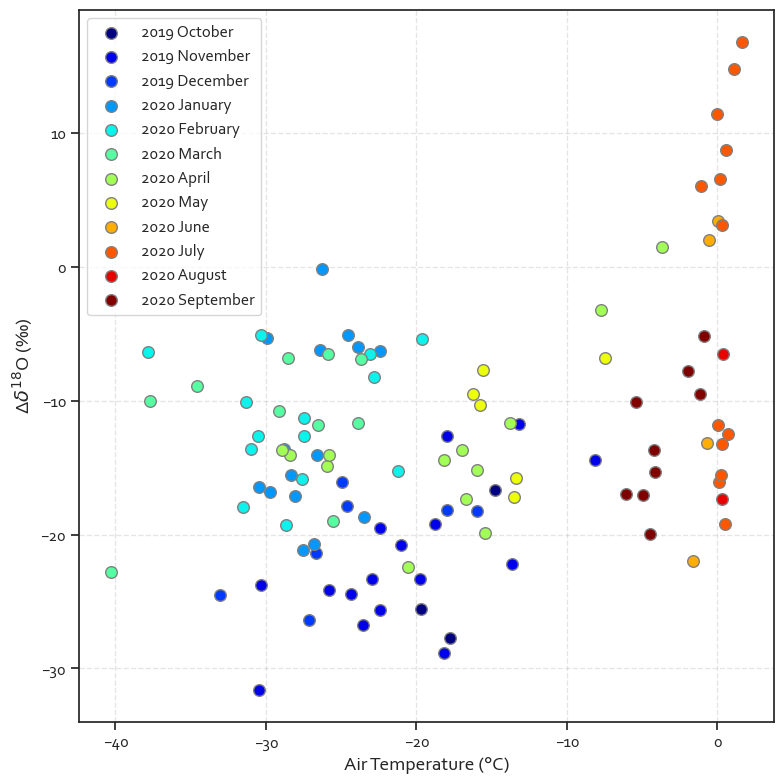

In [66]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm

# Load the dataset
file_path = r"C:\CiASOM\PhD\07.Manuscripts\#2.Snow Surface\Figures\Vapour_Snow\00_All_in_one.xlsx"
sheet_name = "Vap_SS_d18O"
df = pd.read_excel(file_path, sheet_name=sheet_name)

# Calculate the offset between "d18O_SS_average" and "d18O_VAP_average"
df['Offset_d18O'] = df['d18O_VAP_average'] - df['d18O_SS_average']

# Set the font to Corbel for labels and titles
plt.rcParams['font.family'] = 'Corbel'

# Create a color map (Spectral) based on months
cmap = cm.get_cmap('jet', len(df['Month'].unique()))

# Create a scatter plot of "Offset" vs. "Air_Temp" with color-coded points based on months
plt.figure(figsize=(8, 8))
for month, color in zip(df['Month'].unique(), np.linspace(0, 1, len(df['Month'].unique()))):
    month_data = df[df['Month'] == month]
    plt.scatter(
        month_data['Air_Temp'], month_data['Offset_d18O'],
        label=month, color=cmap(color), s=70, marker='o', edgecolor='grey'
    )

plt.xlabel('Air Temperature (°C)', fontsize=14)
plt.ylabel('Δ$\delta^{18}$O (‰)', fontsize=14)

# Show the plot
plt.grid(True, color='gray', linestyle='--', alpha=0.2)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='', fontsize=12)
plt.tight_layout()
plt.show()

AttributeError: module 'matplotlib.pyplot' has no attribute 'spines'

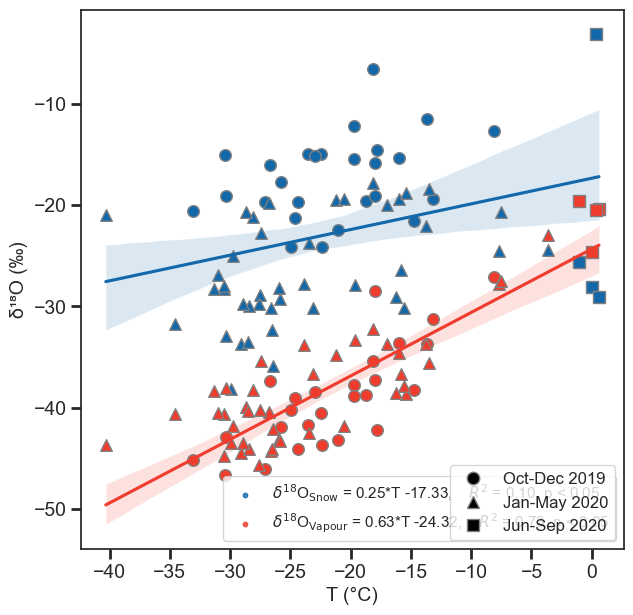

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress
import seaborn as sns
import matplotlib

# Load the data
file_path = "C:\\CiASOM\\PhD\\07.Manuscripts\\#2.Snow Surface\\Second Submission - Elementa\\Revisions\\Data_Figures\\00_All_in_one.xlsx"
sheet_name = "Vap_SS_d18O"
data = pd.read_excel(file_path, sheet_name=sheet_name)

# Ensure the 'Date' column is in datetime format
data['Unique_Date'] = pd.to_datetime(data['Unique_Date'])

# Define date ranges
oct19_dec19 = (data['Unique_Date'] >= '2019-10-01') & (data['Unique_Date'] <= '2019-12-31')
jan20_may20 = (data['Unique_Date'] >= '2020-01-01') & (data['Unique_Date'] <= '2020-05-31')
jun20_sep20 = (data['Unique_Date'] >= '2020-06-01') & (data['Unique_Date'] <= '2020-09-30')

# Drop rows with missing values in the "Air_temp" column
data.dropna(subset=['Air_Temp'], inplace=True)

# Extracting relevant columns
air_temp = data['Air_Temp']
d18O_SS_avg = data['d18O_SS_average']
d18O_VAP_avg = data['d18O_VAP_average']

# Perform linear regression
slope_SS, intercept_SS, r_value_SS, p_value_SS, std_err_SS = linregress(air_temp, d18O_SS_avg)
slope_VAP, intercept_VAP, r_value_VAP, p_value_VAP, std_err_VAP = linregress(air_temp, d18O_VAP_avg)

# Set font family to 'Arial' for the entire plot
matplotlib.rcParams['font.family'] = 'Arial'

# Set font size for labels and legends
plt.rcParams['font.size'] = 12

# Set background to white and create a figure
plt.figure(facecolor='white', figsize=(7, 7))  # Set a bigger figure size (width, height)

# Set custom parameters for seaborn with box around the plot
custom_params = {"axes.spines.right": True, "axes.spines.top": True}
sns.set_theme(style="ticks", rc=custom_params)

# Scatter plot with regression lines
p_value_SS_text = f"p {'< 0.05' if p_value_SS < 0.05 else f'>= 0.05'}"
p_value_VAP_text = f"p {'< 0.05' if p_value_VAP < 0.05 else f'>= 0.05'}"

sns.regplot(x=air_temp, y=d18O_SS_avg, color='#1368AA', label=f'$\delta^{{18}}$O$_{{\mathrm{{Snow}}}}$ = {slope_SS:.2f}*T {intercept_SS:.2f},    $R^2$ = {r_value_SS**2:.2f}, {p_value_SS_text}', scatter_kws={'s': 10})
sns.regplot(x=air_temp, y=d18O_VAP_avg, color='#EF3C2D', label=f'$\delta^{{18}}$O$_{{\mathrm{{Vapour}}}}$ = {slope_VAP:.2f}*T {intercept_VAP:.2f},    $R^2$ = {r_value_VAP**2:.2f}, {p_value_VAP_text}', scatter_kws={'s': 10})

# Overlay scatter plots with different markers and edgecolor for each date range
plt.scatter(air_temp[oct19_dec19], d18O_SS_avg[oct19_dec19], color='#1368AA', s=70, marker='o', edgecolor='grey')
plt.scatter(air_temp[jan20_may20], d18O_SS_avg[jan20_may20], color='#1368AA', s=70, marker='^', edgecolor='grey')
plt.scatter(air_temp[jun20_sep20], d18O_SS_avg[jun20_sep20], color='#1368AA', s=70, marker='s', edgecolor='grey')

plt.scatter(air_temp[oct19_dec19], d18O_VAP_avg[oct19_dec19], color='#EF3C2D', s=70, marker='o', edgecolor='grey')
plt.scatter(air_temp[jan20_may20], d18O_VAP_avg[jan20_may20], color='#EF3C2D', s=70, marker='^', edgecolor='grey')
plt.scatter(air_temp[jun20_sep20], d18O_VAP_avg[jun20_sep20], color='#EF3C2D', s=70, marker='s', edgecolor='grey')


# Add custom legend entries for regression lines
legend = plt.legend()

# Set legend font to Arial
for text in legend.get_texts():
    text.set_fontname('Arial')
    
# Create custom legend for date ranges
from matplotlib.lines import Line2D
custom_lines = [Line2D([0], [0], color='black', marker='o', lw=0, markersize=9, markeredgecolor='grey'),
                Line2D([0], [0], color='black', marker='^', lw=0, markersize=9, markeredgecolor='grey'),
                Line2D([0], [0], color='black', marker='s', lw=0, markersize=9, markeredgecolor='grey')]

legend2 = plt.legend(custom_lines, ['Oct-Dec 2019', 'Jan-May 2020', 'Jun-Sep 2020'], 
                     loc="lower right", fontsize=12)

# Add the first legend manually to the plot
plt.gca().add_artist(legend)

# Set legend font to Arial (for the second legend)
for text in legend2.get_texts():
    text.set_fontname('Arial')
legend2.get_title().set_fontname('Corbel')

# Labeling the plot with Corbel font family
plt.xlabel('T (°C)', fontname='Arial', fontsize=14)
plt.ylabel('δ¹⁸O (‰)', fontname='Arial', fontsize=14)

# Set tick labels font to Corbel
plt.xticks(fontname='Arial')
plt.yticks(fontname='Arial')

# Set the size of the tick labels
plt.tick_params(axis='x', labelsize=14, length=7, width=2)
plt.tick_params(axis='y', labelsize=14, length=7, width=2)

# Set the spine thickness (the box around the plot)
spine_width = 2
plt.spines['top'].set_linewidth(spine_width)
plt.spines['right'].set_linewidth(spine_width)
plt.spines['left'].set_linewidth(spine_width)
plt.spines['bottom'].set_linewidth(spine_width)

# Adding gridlines in grey, dashed, and 20% transparent
plt.grid(True, color="#808080", linestyle='--', alpha=0.2)

# Set x and y-axis limits to the complete dataset "data"
plt.xlim(-42,3)
plt.ylim(-53,2)

# Save the plot as a 600 dpi JPEG file in the same folder
plt.savefig("C:\\CiASOM\\PhD\\07.Manuscripts\\#2.Snow Surface\\Second Submission - Elementa\\Revisions\\Data_Figures\\airtemp_d18O_12052025.jpg", dpi=600, bbox_inches='tight')

# Show the plot
plt.show()

C:\Users\mardakan\AppData\Local\Temp\ipykernel_19548\1811796984.py:95: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticks(), fontname='Arial')
C:\Users\mardakan\AppData\Local\Temp\ipykernel_19548\1811796984.py:96: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticks(), fontname='Arial')


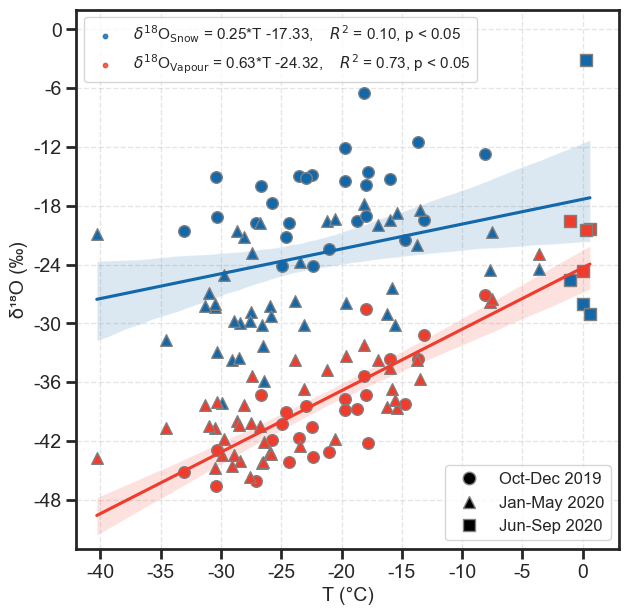

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress
import seaborn as sns
import matplotlib
import matplotlib.ticker as ticker

# Load the data
file_path = "C:\\CiASOM\\PhD\\07.Manuscripts\\#2.Snow Surface\\Second Submission - Elementa\\Revisions\\Data_Figures\\00_All_in_one.xlsx"
sheet_name = "Vap_SS_d18O"
data = pd.read_excel(file_path, sheet_name=sheet_name)

# Ensure the 'Date' column is in datetime format
data['Unique_Date'] = pd.to_datetime(data['Unique_Date'])

# Define date ranges
oct19_dec19 = (data['Unique_Date'] >= '2019-10-01') & (data['Unique_Date'] <= '2019-12-31')
jan20_may20 = (data['Unique_Date'] >= '2020-01-01') & (data['Unique_Date'] <= '2020-05-31')
jun20_sep20 = (data['Unique_Date'] >= '2020-06-01') & (data['Unique_Date'] <= '2020-09-30')

# Drop rows with missing values in the "Air_temp" column
data.dropna(subset=['Air_Temp'], inplace=True)

# Extracting relevant columns
air_temp = data['Air_Temp']
d18O_SS_avg = data['d18O_SS_average']
d18O_VAP_avg = data['d18O_VAP_average']

# Perform linear regression
slope_SS, intercept_SS, r_value_SS, p_value_SS, std_err_SS = linregress(air_temp, d18O_SS_avg)
slope_VAP, intercept_VAP, r_value_VAP, p_value_VAP, std_err_VAP = linregress(air_temp, d18O_VAP_avg)

# Set font family to 'Arial' for the entire plot
matplotlib.rcParams['font.family'] = 'Arial'

# Set font size for labels and legends
plt.rcParams['font.size'] = 12

# Create a figure and axis object
fig, ax = plt.subplots(figsize=(7, 7))  # Set a bigger figure size (width, height)

# Set background to white and create a figure
fig.patch.set_facecolor('white')

# Set custom parameters for seaborn with box around the plot
custom_params = {"axes.spines.right": True, "axes.spines.top": True}
sns.set_theme(style="ticks", rc=custom_params)

# Scatter plot with regression lines
p_value_SS_text = f"p {'< 0.05' if p_value_SS < 0.05 else f'>= 0.05'}"
p_value_VAP_text = f"p {'< 0.05' if p_value_VAP < 0.05 else f'>= 0.05'}"

sns.regplot(x=air_temp, y=d18O_SS_avg, ax=ax, color='#1368AA', label=f'$\delta^{{18}}$O$_{{\mathrm{{Snow}}}}$ = {slope_SS:.2f}*T {intercept_SS:.2f},    $R^2$ = {r_value_SS**2:.2f}, {p_value_SS_text}', scatter_kws={'s': 10})
sns.regplot(x=air_temp, y=d18O_VAP_avg, ax=ax, color='#EF3C2D', label=f'$\delta^{{18}}$O$_{{\mathrm{{Vapour}}}}$ = {slope_VAP:.2f}*T {intercept_VAP:.2f},    $R^2$ = {r_value_VAP**2:.2f}, {p_value_VAP_text}', scatter_kws={'s': 10})

# Overlay scatter plots with different markers and edgecolor for each date range
ax.scatter(air_temp[oct19_dec19], d18O_SS_avg[oct19_dec19], color='#1368AA', s=70, marker='o', edgecolor='grey')
ax.scatter(air_temp[jan20_may20], d18O_SS_avg[jan20_may20], color='#1368AA', s=70, marker='^', edgecolor='grey')
ax.scatter(air_temp[jun20_sep20], d18O_SS_avg[jun20_sep20], color='#1368AA', s=70, marker='s', edgecolor='grey')

ax.scatter(air_temp[oct19_dec19], d18O_VAP_avg[oct19_dec19], color='#EF3C2D', s=70, marker='o', edgecolor='grey')
ax.scatter(air_temp[jan20_may20], d18O_VAP_avg[jan20_may20], color='#EF3C2D', s=70, marker='^', edgecolor='grey')
ax.scatter(air_temp[jun20_sep20], d18O_VAP_avg[jun20_sep20], color='#EF3C2D', s=70, marker='s', edgecolor='grey')


# Add custom legend entries for regression lines
legend = ax.legend()

# Set legend font to Arial
for text in legend.get_texts():
    text.set_fontname('Arial')
    
# Create custom legend for date ranges
from matplotlib.lines import Line2D
custom_lines = [Line2D([0], [0], color='black', marker='o', lw=0, markersize=9, markeredgecolor='grey'),
                Line2D([0], [0], color='black', marker='^', lw=0, markersize=9, markeredgecolor='grey'),
                Line2D([0], [0], color='black', marker='s', lw=0, markersize=9, markeredgecolor='grey')]

legend2 = ax.legend(custom_lines, ['Oct-Dec 2019', 'Jan-May 2020', 'Jun-Sep 2020'], 
                     loc="lower right", fontsize=12)

# Add the first legend manually to the plot
ax.add_artist(legend)

# Set legend font to Arial (for the second legend)
for text in legend2.get_texts():
    text.set_fontname('Arial')
legend2.get_title().set_fontname('Corbel')

# Labeling the plot with Corbel font family
ax.set_xlabel('T (°C)', fontname='Arial', fontsize=14)
ax.set_ylabel('δ¹⁸O (‰)', fontname='Arial', fontsize=14)

# Set tick labels font to Arial
ax.set_xticklabels(ax.get_xticks(), fontname='Arial')
ax.set_yticklabels(ax.get_yticks(), fontname='Arial')

# Set the size of the tick labels
ax.tick_params(axis='x', labelsize=14, length=7, width=2)
ax.tick_params(axis='y', labelsize=14, length=7, width=2)

# Set the spine thickness (the box around the plot)
spine_width = 2
ax.spines['top'].set_linewidth(spine_width)
ax.spines['right'].set_linewidth(spine_width)
ax.spines['left'].set_linewidth(spine_width)
ax.spines['bottom'].set_linewidth(spine_width)

# Set the x and y axis ticks to display integers without decimals
ax.xaxis.set_major_locator(ticker.MaxNLocator(integer=True))
ax.yaxis.set_major_locator(ticker.MaxNLocator(integer=True))

# If you want to also remove decimals for non-integer ticks and show only the integer part
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x)}'))
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x)}'))

# Adding gridlines in grey, dashed, and 20% transparent
ax.grid(True, color="#808080", linestyle='--', alpha=0.2)

# Set x and y-axis limits to the complete dataset "data"
ax.set_xlim(-42, 3)
ax.set_ylim(-53, 2)

# Save the plot as a 600 dpi JPEG file in the same folder
plt.savefig("C:\\CiASOM\\PhD\\07.Manuscripts\\#2.Snow Surface\\Second Submission - Elementa\\Revisions\\Data_Figures\\fig06_airtemp_d18O_12052025.jpg", dpi=600, bbox_inches='tight')

# Show the plot
plt.show()

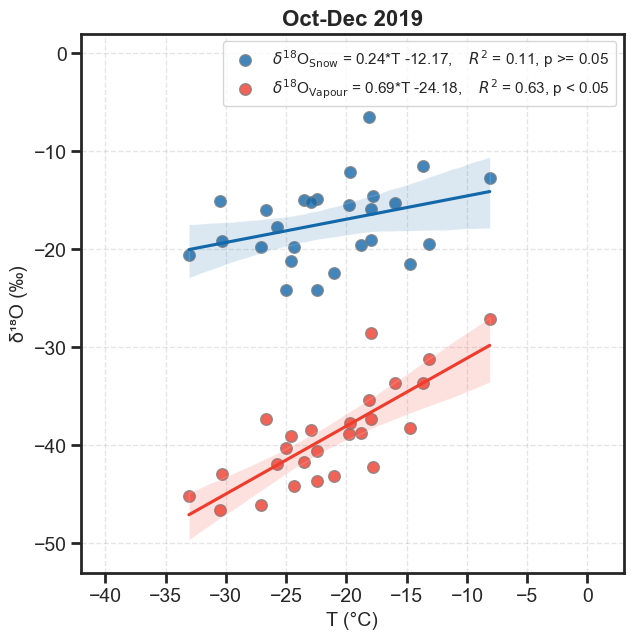

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress
import seaborn as sns
import matplotlib

# Load the data
file_path = "C:\\CiASOM\\PhD\\07.Manuscripts\\#2.Snow Surface\\Second Submission - Elementa\\Revisions\\Data_Figures\\00_All_in_one.xlsx"
sheet_name = "Vap_SS_d18O"
data = pd.read_excel(file_path, sheet_name=sheet_name)

# Ensure the 'Date' column is in datetime format
data['Unique_Date'] = pd.to_datetime(data['Unique_Date'])

# Define date ranges
oct19_dec19 = (data['Unique_Date'] >= '2019-10-01') & (data['Unique_Date'] <= '2019-12-31')

# Filter the data for October 2019 to December 2019
data_oct_dec = data.loc[oct19_dec19].copy()

# Drop rows with missing values in the "Air_temp" column
data_oct_dec.dropna(subset=['Air_Temp'], inplace=True)

# Extracting relevant columns
air_temp = data_oct_dec['Air_Temp']
d18O_SS_avg = data_oct_dec['d18O_SS_average']
d18O_VAP_avg = data_oct_dec['d18O_VAP_average']

# Perform linear regression
slope_SS, intercept_SS, r_value_SS, p_value_SS, std_err_SS = linregress(air_temp, d18O_SS_avg)
slope_VAP, intercept_VAP, r_value_VAP, p_value_VAP, std_err_VAP = linregress(air_temp, d18O_VAP_avg)

# Set font family to 'Arial' for the entire plot
matplotlib.rcParams['font.family'] = 'Arial'

# Set font size for labels and legends
plt.rcParams['font.size'] = 12

# Set background to white and create a figure
plt.figure(facecolor='white', figsize=(7, 7))  # Set a bigger figure size (width, height)

# Set custom parameters for seaborn with box around the plot
custom_params = {"axes.spines.right": True, "axes.spines.top": True}
sns.set_theme(style="ticks", rc=custom_params)

# Scatter plot with regression lines
p_value_SS_text = f"p {'< 0.05' if p_value_SS < 0.05 else f'>= 0.05'}"
p_value_VAP_text = f"p {'< 0.05' if p_value_VAP < 0.05 else f'>= 0.05'}"

ax = plt.gca()  # Get the current Axes object

sns.regplot(x=air_temp, y=d18O_SS_avg, color='#1368AA', label=f'$\delta^{{18}}$O$_{{\mathrm{{Snow}}}}$ = {slope_SS:.2f}*T {intercept_SS:.2f},    $R^2$ = {r_value_SS**2:.2f}, {p_value_SS_text}', scatter_kws={'s': 70, 'edgecolor': 'grey'}, marker='o')
sns.regplot(x=air_temp, y=d18O_VAP_avg, color='#EF3C2D', label=f'$\delta^{{18}}$O$_{{\mathrm{{Vapour}}}}$ = {slope_VAP:.2f}*T {intercept_VAP:.2f},    $R^2$ = {r_value_VAP**2:.2f}, {p_value_VAP_text}', scatter_kws={'s': 70, 'edgecolor': 'grey'}, marker='o')

# Add custom legend entries for regression lines
legend = plt.legend()

# Set legend font to Arial
for text in legend.get_texts():
    text.set_fontname('Arial')
    
# Labeling the plot with Arial font family
plt.xlabel('T (°C)', fontname='Arial', fontsize=14)
plt.ylabel('δ¹⁸O (‰)', fontname='Arial', fontsize=14)

# Set tick labels font to Corbel
plt.xticks(fontname='Arial')
plt.yticks(fontname='Arial')

# Set the size of the tick labels
ax.tick_params(axis='x', labelsize=14, length=7, width=2)
ax.tick_params(axis='y', labelsize=14, length=7, width=2)

# Set the spine thickness (the box around the plot)
spine_width = 2
ax.spines['top'].set_linewidth(spine_width)
ax.spines['right'].set_linewidth(spine_width)
ax.spines['left'].set_linewidth(spine_width)
ax.spines['bottom'].set_linewidth(spine_width)

# Adding gridlines in grey, dashed, and 20% transparent
plt.grid(True, color="#808080", linestyle='--', alpha=0.2)

# Set x and y-axis limits to the complete dataset "data"
plt.xlim(-42,3)
plt.ylim(-53,2)

# Add a title to the plot
plt.title("Oct-Dec 2019", fontsize=16, fontname='Arial', fontweight='bold')

# Save the plot as a 600 dpi JPEG file in the same folder
plt.savefig("C:\\CiASOM\\PhD\\07.Manuscripts\\#2.Snow Surface\\Second Submission - Elementa\\Revisions\\Data_Figures\\fig06_airtemp_d18O_oct_dec_2019.jpg", dpi=600, bbox_inches='tight')

# Show the plot
plt.show()

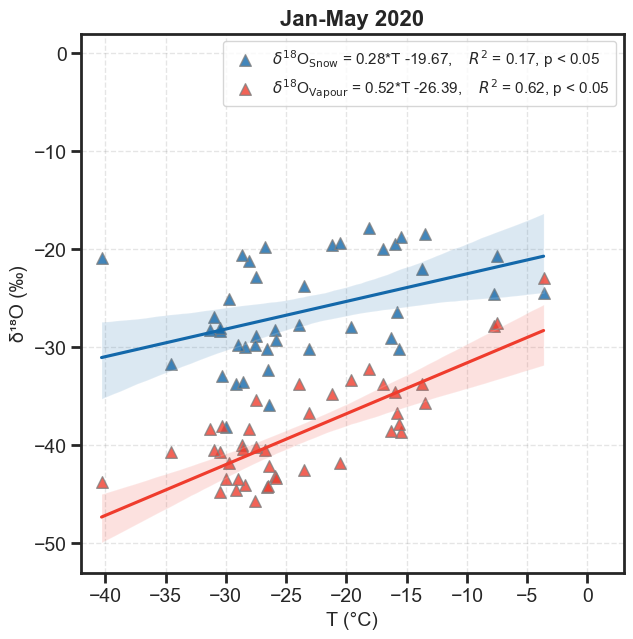

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress
import seaborn as sns
import matplotlib

# Load the data
file_path = "C:\\CiASOM\\PhD\\07.Manuscripts\\#2.Snow Surface\\Second Submission - Elementa\\Revisions\\Data_Figures\\00_All_in_one.xlsx"
sheet_name = "Vap_SS_d18O"
data = pd.read_excel(file_path, sheet_name=sheet_name)

# Ensure the 'Date' column is in datetime format
data['Unique_Date'] = pd.to_datetime(data['Unique_Date'])

# Define date ranges
jan20_may20 = (data['Unique_Date'] >= '2020-01-01') & (data['Unique_Date'] <= '2020-05-31')

# Filter the data for October 2019 to December 2019
data_jan_may = data.loc[jan20_may20].copy()

# Drop rows with missing values in the "Air_temp" column
data_jan_may.dropna(subset=['Air_Temp'], inplace=True)

# Extracting relevant columns
air_temp = data_jan_may['Air_Temp']
d18O_SS_avg = data_jan_may['d18O_SS_average']
d18O_VAP_avg = data_jan_may['d18O_VAP_average']

# Perform linear regression
slope_SS, intercept_SS, r_value_SS, p_value_SS, std_err_SS = linregress(air_temp, d18O_SS_avg)
slope_VAP, intercept_VAP, r_value_VAP, p_value_VAP, std_err_VAP = linregress(air_temp, d18O_VAP_avg)

# Set font family to 'Arial' for the entire plot
matplotlib.rcParams['font.family'] = 'Arial'

# Set font size for labels and legends
plt.rcParams['font.size'] = 12

# Set background to white and create a figure
plt.figure(facecolor='white', figsize=(7, 7))  # Set a bigger figure size (width, height)

# Set custom parameters for seaborn with box around the plot
custom_params = {"axes.spines.right": True, "axes.spines.top": True}
sns.set_theme(style="ticks", rc=custom_params)

# Scatter plot with regression lines
p_value_SS_text = f"p {'< 0.05' if p_value_SS < 0.05 else f'>= 0.05'}"
p_value_VAP_text = f"p {'< 0.05' if p_value_VAP < 0.05 else f'>= 0.05'}"

ax = plt.gca()  # Get the current Axes object

sns.regplot(x=air_temp, y=d18O_SS_avg, color='#1368AA', label=f'$\delta^{{18}}$O$_{{\mathrm{{Snow}}}}$ = {slope_SS:.2f}*T {intercept_SS:.2f},    $R^2$ = {r_value_SS**2:.2f}, {p_value_SS_text}', scatter_kws={'s': 70, 'edgecolor': 'grey'}, marker='^')
sns.regplot(x=air_temp, y=d18O_VAP_avg, color='#EF3C2D', label=f'$\delta^{{18}}$O$_{{\mathrm{{Vapour}}}}$ = {slope_VAP:.2f}*T {intercept_VAP:.2f},    $R^2$ = {r_value_VAP**2:.2f}, {p_value_VAP_text}', scatter_kws={'s': 70, 'edgecolor': 'grey'}, marker='^')

# Add custom legend entries for regression lines
legend = plt.legend()

# Set legend font to Arial
for text in legend.get_texts():
    text.set_fontname('Arial')
    
# Labeling the plot with Corbel font family
plt.xlabel('T (°C)', fontname='Arial', fontsize=14)
plt.ylabel('δ¹⁸O (‰)', fontname='Arial', fontsize=14)

# Set tick labels font to Arial
plt.xticks(fontname='Arial')
plt.yticks(fontname='Arial')

# Set the size of the tick labels
ax.tick_params(axis='x', labelsize=14, length=7, width=2)
ax.tick_params(axis='y', labelsize=14, length=7, width=2)

# Set the spine thickness (the box around the plot)
spine_width = 2
ax.spines['top'].set_linewidth(spine_width)
ax.spines['right'].set_linewidth(spine_width)
ax.spines['left'].set_linewidth(spine_width)
ax.spines['bottom'].set_linewidth(spine_width)

# Adding gridlines in grey, dashed, and 20% transparent
plt.grid(True, color="#808080", linestyle='--', alpha=0.2)

# Set x and y-axis limits to the complete dataset "data"
plt.xlim(-42,3)
plt.ylim(-53,2)

# Add a title to the plot
plt.title("Jan-May 2020", fontsize=16, fontname='Arial', fontweight='bold')

# Save the plot as a 600 dpi JPEG file in the same folder
plt.savefig("C:\\CiASOM\\PhD\\07.Manuscripts\\#2.Snow Surface\\Second Submission - Elementa\\Revisions\\Data_Figures\\fig06_airtemp_d18O_jan_may_2020.jpg", dpi=600, bbox_inches='tight')

# Show the plot
plt.show()

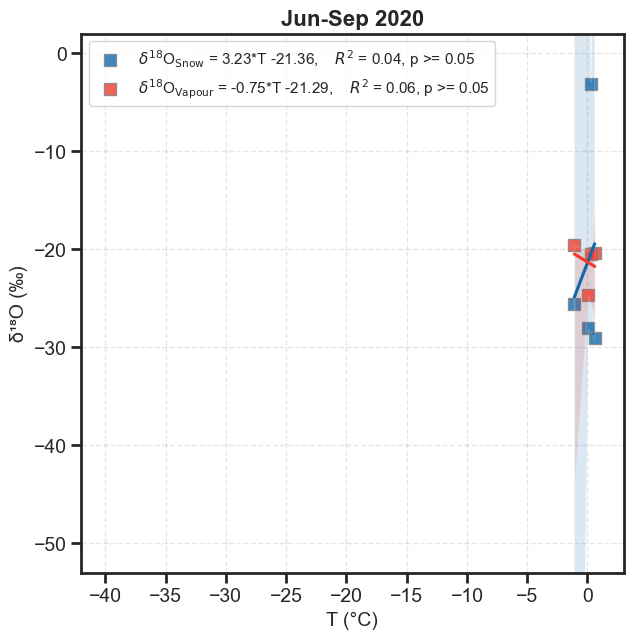

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress
import seaborn as sns
import matplotlib

# Load the data
file_path = "C:\\CiASOM\\PhD\\07.Manuscripts\\#2.Snow Surface\\Second Submission - Elementa\\Revisions\\Data_Figures\\00_All_in_one.xlsx"
sheet_name = "Vap_SS_d18O"
data = pd.read_excel(file_path, sheet_name=sheet_name)

# Ensure the 'Date' column is in datetime format
data['Unique_Date'] = pd.to_datetime(data['Unique_Date'])

# Define date ranges
jun20_sep20 = (data['Unique_Date'] >= '2020-06-01') & (data['Unique_Date'] <= '2020-09-30')

# Filter the data for October 2019 to December 2019
data_jun_sep = data.loc[jun20_sep20].copy()

# Drop rows with missing values in the "Air_temp" column
data_jun_sep.dropna(subset=['Air_Temp'], inplace=True)

# Extracting relevant columns
air_temp = data_jun_sep['Air_Temp']
d18O_SS_avg = data_jun_sep['d18O_SS_average']
d18O_VAP_avg = data_jun_sep['d18O_VAP_average']

# Perform linear regression
slope_SS, intercept_SS, r_value_SS, p_value_SS, std_err_SS = linregress(air_temp, d18O_SS_avg)
slope_VAP, intercept_VAP, r_value_VAP, p_value_VAP, std_err_VAP = linregress(air_temp, d18O_VAP_avg)

# Set font family to 'Arial' for the entire plot
matplotlib.rcParams['font.family'] = 'Arial'

# Set font size for labels and legends
plt.rcParams['font.size'] = 12

# Set background to white and create a figure
plt.figure(facecolor='white', figsize=(7, 7))  # Set a bigger figure size (width, height)

# Set custom parameters for seaborn with box around the plot
custom_params = {"axes.spines.right": True, "axes.spines.top": True}
sns.set_theme(style="ticks", rc=custom_params)

# Scatter plot with regression lines
p_value_SS_text = f"p {'< 0.05' if p_value_SS < 0.05 else f'>= 0.05'}"
p_value_VAP_text = f"p {'< 0.05' if p_value_VAP < 0.05 else f'>= 0.05'}"

ax = plt.gca()  # Get the current Axes object

sns.regplot(x=air_temp, y=d18O_SS_avg, color='#1368AA', label=f'$\delta^{{18}}$O$_{{\mathrm{{Snow}}}}$ = {slope_SS:.2f}*T {intercept_SS:.2f},    $R^2$ = {r_value_SS**2:.2f}, {p_value_SS_text}', scatter_kws={'s': 70, 'edgecolor': 'grey'}, marker='s')
sns.regplot(x=air_temp, y=d18O_VAP_avg, color='#EF3C2D', label=f'$\delta^{{18}}$O$_{{\mathrm{{Vapour}}}}$ = {slope_VAP:.2f}*T {intercept_VAP:.2f},    $R^2$ = {r_value_VAP**2:.2f}, {p_value_VAP_text}', scatter_kws={'s': 70, 'edgecolor': 'grey'}, marker='s')

# Add custom legend entries for regression lines
legend = plt.legend()

# Set legend font to Arial
for text in legend.get_texts():
    text.set_fontname('Arial')
    
# Labeling the plot with Arial font family
plt.xlabel('T (°C)', fontname='Arial', fontsize=14)
plt.ylabel('δ¹⁸O (‰)', fontname='Arial', fontsize=14)

# Set tick labels font to Arial
plt.xticks(fontname='Arial')
plt.yticks(fontname='Arial')

# Set the size of the tick labels
ax.tick_params(axis='x', labelsize=14, length=7, width=2)
ax.tick_params(axis='y', labelsize=14, length=7, width=2)

# Set the spine thickness (the box around the plot)
spine_width = 2
ax.spines['top'].set_linewidth(spine_width)
ax.spines['right'].set_linewidth(spine_width)
ax.spines['left'].set_linewidth(spine_width)
ax.spines['bottom'].set_linewidth(spine_width)

# Adding gridlines in grey, dashed, and 20% transparent
plt.grid(True, color="#808080", linestyle='--', alpha=0.2)

# Set x and y-axis limits to the complete dataset "data"
plt.xlim(-42,3)
plt.ylim(-53,2)

# Add a title to the plot
plt.title("Jun-Sep 2020", fontsize=16, fontname='Arial', fontweight='bold')

# Save the plot as a 600 dpi JPEG file in the same folder
plt.savefig("C:\\CiASOM\\PhD\\07.Manuscripts\\#2.Snow Surface\\Second Submission - Elementa\\Revisions\\Data_Figures\\fig06_airtemp_d18O_jun_sep_2020.jpg", dpi=600, bbox_inches='tight')

# Show the plot
plt.show()

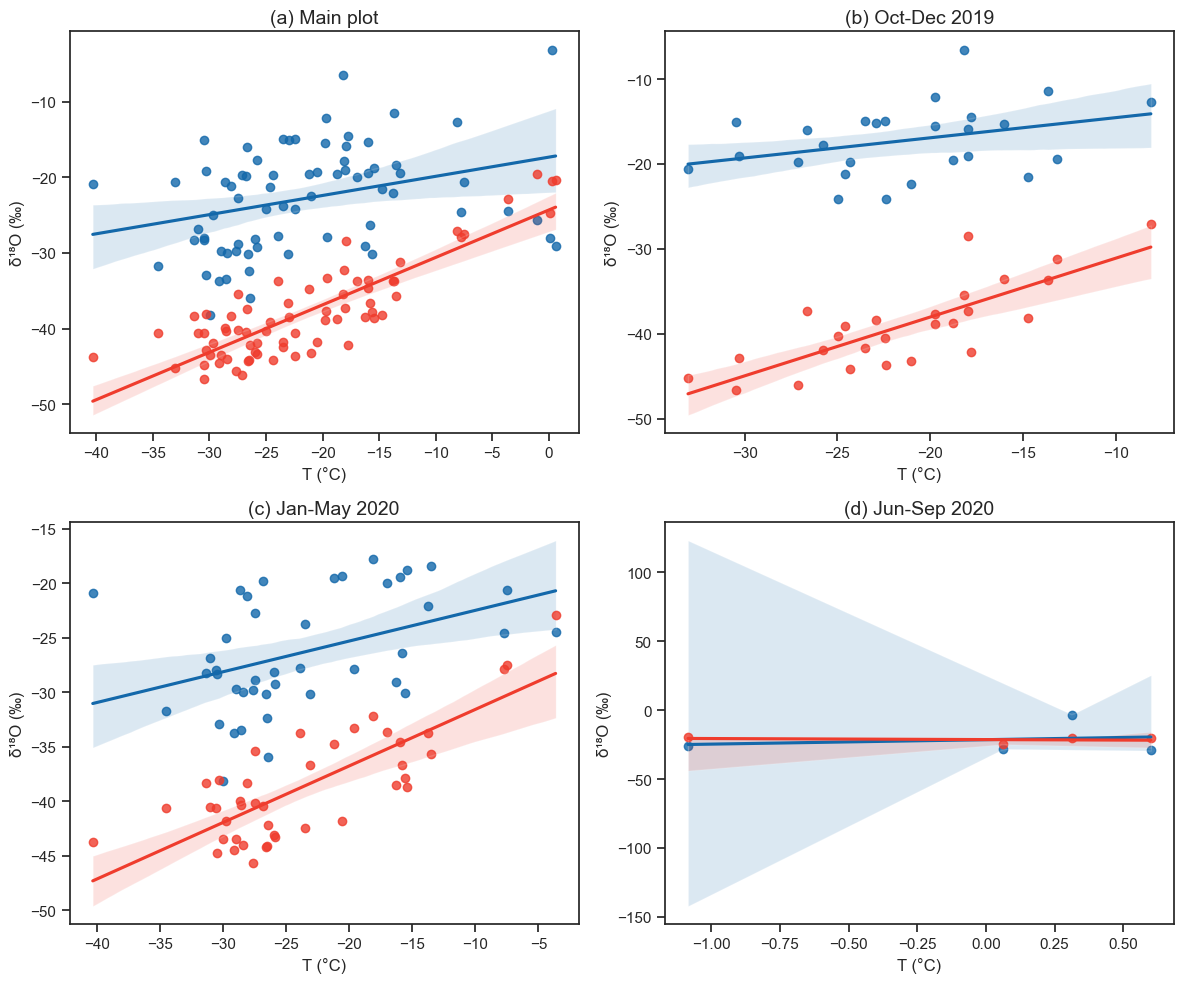

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy.stats import linregress

# Example data (replace these with your own data)
# Load your data as done previously
file_path = "C:\\CiASOM\\PhD\\07.Manuscripts\\#2.Snow Surface\\Second Submission - Elementa\\Revisions\\Data_Figures\\00_All_in_one.xlsx"
sheet_name = "Vap_SS_d18O"
data = pd.read_excel(file_path, sheet_name=sheet_name)

# Ensure the 'Date' column is in datetime format
data['Unique_Date'] = pd.to_datetime(data['Unique_Date'])

# Define date ranges
oct19_dec19 = (data['Unique_Date'] >= '2019-10-01') & (data['Unique_Date'] <= '2019-12-31')
jan20_may20 = (data['Unique_Date'] >= '2020-01-01') & (data['Unique_Date'] <= '2020-05-31')
jun20_sep20 = (data['Unique_Date'] >= '2020-06-01') & (data['Unique_Date'] <= '2020-09-30')

# Extract relevant columns
air_temp = data['Air_Temp']
d18O_SS_avg = data['d18O_SS_average']
d18O_VAP_avg = data['d18O_VAP_average']

# Perform linear regression for each dataset
slope_SS, intercept_SS, r_value_SS, p_value_SS, std_err_SS = linregress(air_temp, d18O_SS_avg)
slope_VAP, intercept_VAP, r_value_VAP, p_value_VAP, std_err_VAP = linregress(air_temp, d18O_VAP_avg)

# Create a 2x2 grid of subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Plot (a) Main plot
sns.regplot(x=air_temp, y=d18O_SS_avg, ax=axs[0, 0], color='#1368AA', 
            label=r'$\delta^{18}$O$_{\mathrm{Snow}}$ = {slope_SS:.2f}*T {intercept_SS:.2f}, $R^2$ = {r_value_SS**2:.2f}')

sns.regplot(x=air_temp, y=d18O_VAP_avg, ax=axs[0, 0], color='#EF3C2D', 
            label=r'$\delta^{18}$O$_{\mathrm{Vapour}}$ = {slope_VAP:.2f}*T {intercept_VAP:.2f}, $R^2$ = {r_value_VAP**2:.2f}')

# Add title and annotations
axs[0, 0].set_title('(a) Main plot', fontsize=14)
axs[0, 0].set_xlabel('T (°C)', fontsize=12)
axs[0, 0].set_ylabel('δ¹⁸O (‰)', fontsize=12)

# Plot (b) Oct-Dec 2019
sns.regplot(x=air_temp[oct19_dec19], y=d18O_SS_avg[oct19_dec19], ax=axs[0, 1], color='#1368AA', label='Oct-Dec 2019')
sns.regplot(x=air_temp[oct19_dec19], y=d18O_VAP_avg[oct19_dec19], ax=axs[0, 1], color='#EF3C2D', label='Oct-Dec 2019')

# Add title and annotations
axs[0, 1].set_title('(b) Oct-Dec 2019', fontsize=14)
axs[0, 1].set_xlabel('T (°C)', fontsize=12)
axs[0, 1].set_ylabel('δ¹⁸O (‰)', fontsize=12)

# Plot (c) Jan-May 2020
sns.regplot(x=air_temp[jan20_may20], y=d18O_SS_avg[jan20_may20], ax=axs[1, 0], color='#1368AA', label='Jan-May 2020')
sns.regplot(x=air_temp[jan20_may20], y=d18O_VAP_avg[jan20_may20], ax=axs[1, 0], color='#EF3C2D', label='Jan-May 2020')

# Add title and annotations
axs[1, 0].set_title('(c) Jan-May 2020', fontsize=14)
axs[1, 0].set_xlabel('T (°C)', fontsize=12)
axs[1, 0].set_ylabel('δ¹⁸O (‰)', fontsize=12)

# Plot (d) Jun-Sep 2020
sns.regplot(x=air_temp[jun20_sep20], y=d18O_SS_avg[jun20_sep20], ax=axs[1, 1], color='#1368AA', label='Jun-Sep 2020')
sns.regplot(x=air_temp[jun20_sep20], y=d18O_VAP_avg[jun20_sep20], ax=axs[1, 1], color='#EF3C2D', label='Jun-Sep 2020')

# Add title and annotations
axs[1, 1].set_title('(d) Jun-Sep 2020', fontsize=14)
axs[1, 1].set_xlabel('T (°C)', fontsize=12)
axs[1, 1].set_ylabel('δ¹⁸O (‰)', fontsize=12)

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the figure
plt.show()
